# Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated. The goal of this project is to use the collection of features to  predict whether or not a claim is fraudulent.

# About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is whether claim application is fraudulent or not - FraudFound_P

In [1]:
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1vvJdGZr935i5wDAFh2s0s8NUM5O0ni9n/view?usp=drive_link" # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

Different types of Variables in our dataset.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [3]:
Categorical_Variables= ['Month','WeekOfMonth','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Sex','MaritalStatus','Fault','PolicyType','VehicleCategory','VehiclePrice','FraudFound_P','RepNumber','DriverRating','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','Year','BasePolicy']

In [4]:
Categorical= ['Month','WeekOfMonth','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Sex','MaritalStatus','Fault','PolicyType','VehicleCategory','VehiclePrice','RepNumber','DriverRating','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','Year','BasePolicy']

In [5]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Unique Values in the dataset

In [6]:
for column in df[Categorical_Variables]:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print()

Unique values in column 'Month': ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

Unique values in column 'WeekOfMonth': [5 3 2 4 1]

Unique values in column 'DayOfWeek': ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Unique values in column 'Make': ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

Unique values in column 'AccidentArea': ['Urban' 'Rural']

Unique values in column 'DayOfWeekClaimed': ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

Unique values in column 'MonthClaimed': ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Unique values in column 'WeekOfMonthClaimed': [1 4 2 3 5]

Unique values in column 'Sex': ['Female' 'Male']

Unique values in column 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']

Unique values in column 'Fault': ['P

In [7]:
Categorical_Variables_1=['Month','WeekOfMonth','DayOfWeek','AccidentArea','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Sex','Fault','VehiclePrice','DriverRating','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','NumberOfCars','Year']

In [8]:
Nominal_Variables = ['AddressChange_Claim','BasePolicy','Days_Policy_Accident','Days_Policy_Claim','Make','MaritalStatus','PastNumberOfClaims','PolicyType','RepNumber','VehicleCategory']

Let's look if there are any missing Values in the dataset

In [9]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

**There are no missing values in the dataset.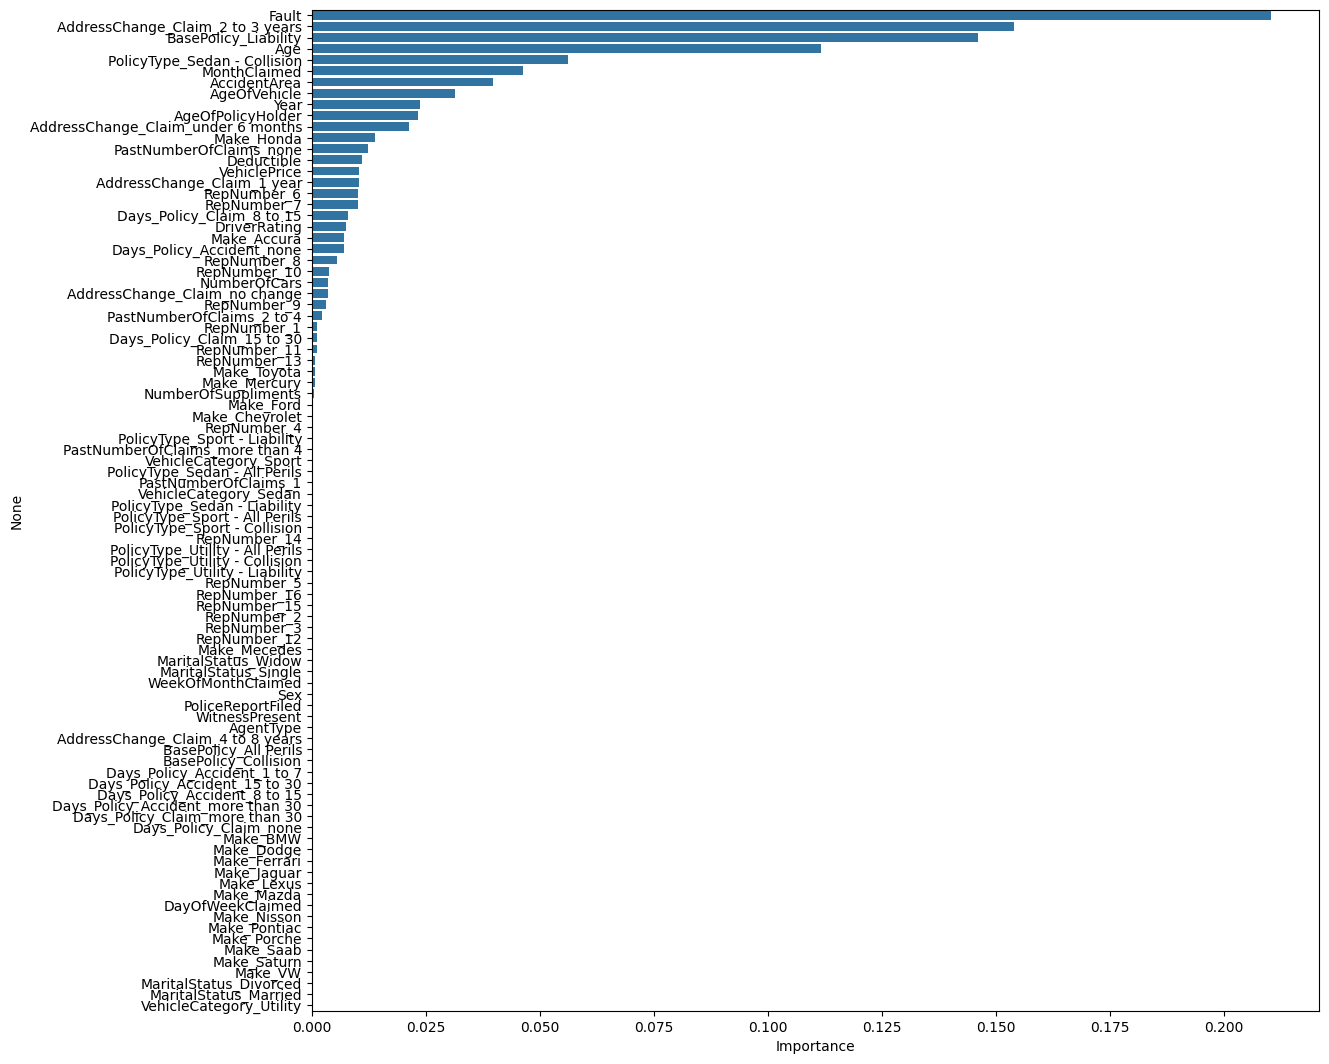**

Let us look into the statistical summary of the numerical variables in the dataset

In [10]:
print(df.describe())

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000 

# **Exploratory Data Analysis**

Histogram for Numerical Variables

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Deductible'}>],
       [<Axes: title={'center': 'PolicyNumber'}>, <Axes: >]], dtype=object)

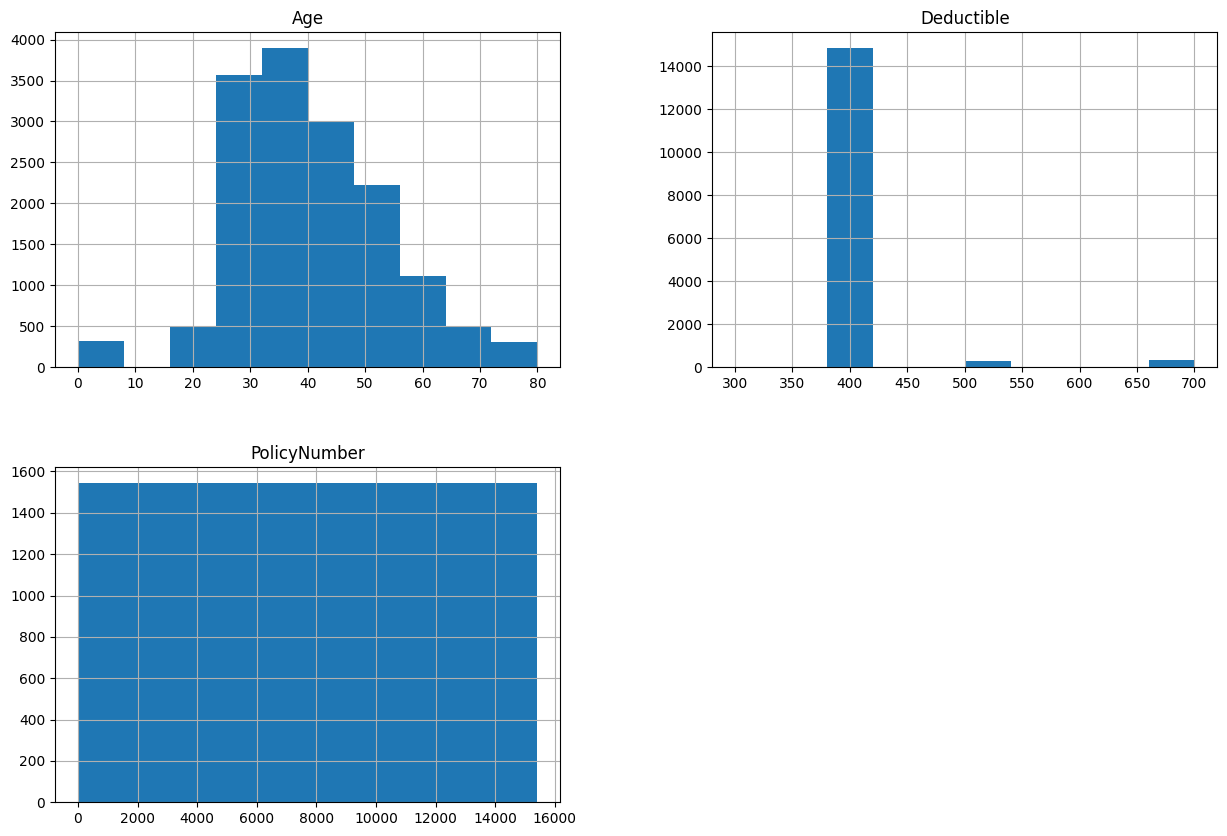

In [11]:
df.loc[:, df.columns.difference(Categorical_Variables)].hist(figsize=(15, 10))

The Age histogram reveals that most of the people in the dataset are aged from 25 to 50.

In [12]:
numeric_df = df.drop(columns=Categorical)

In [13]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           15420 non-null  int64
 1   FraudFound_P  15420 non-null  int64
 2   PolicyNumber  15420 non-null  int64
 3   Deductible    15420 non-null  int64
dtypes: int64(4)
memory usage: 482.0 KB


**Statistical Summary of Numerical Variables**

In [14]:
summary = numeric_df.describe()

# Print the summary
print(summary)

                Age  FraudFound_P  PolicyNumber    Deductible
count  15420.000000  15420.000000  15420.000000  15420.000000
mean      39.855707      0.059857   7710.500000    407.704280
std       13.492377      0.237230   4451.514911     43.950998
min        0.000000      0.000000      1.000000    300.000000
25%       31.000000      0.000000   3855.750000    400.000000
50%       38.000000      0.000000   7710.500000    400.000000
75%       48.000000      0.000000  11565.250000    400.000000
max       80.000000      1.000000  15420.000000    700.000000


# **Bivariate Analysis for Numerical Variables**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


means = numeric_df.groupby('FraudFound_P').mean()
medians = numeric_df.groupby('FraudFound_P').median()

print("Mean of numeric variables in association with target Variable")
print()
print(means)


Mean of numeric variables in association with target Variable

                    Age  PolicyNumber  Deductible
FraudFound_P                                     
0             39.956957   7733.351038  407.511899
1             38.265439   7351.592633  410.725894


In [16]:
print("Medians of numeric variables in association with target Variable")
print()
print(medians)

Medians of numeric variables in association with target Variable

               Age  PolicyNumber  Deductible
FraudFound_P                                
0             38.0        7755.0       400.0
1             36.0        7019.0       400.0


In [17]:
Fraud_data = df[df['FraudFound_P'] == 1]
No_Fraud_data = df[df['FraudFound_P'] == 0]

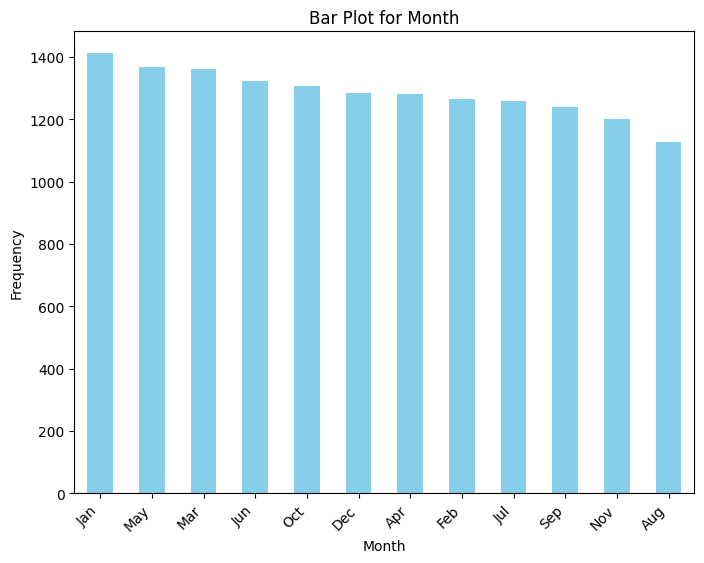

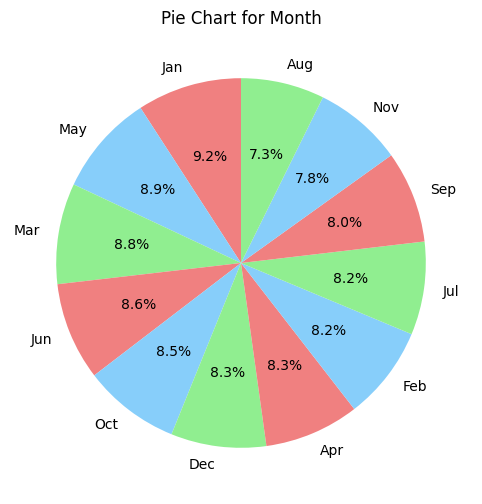

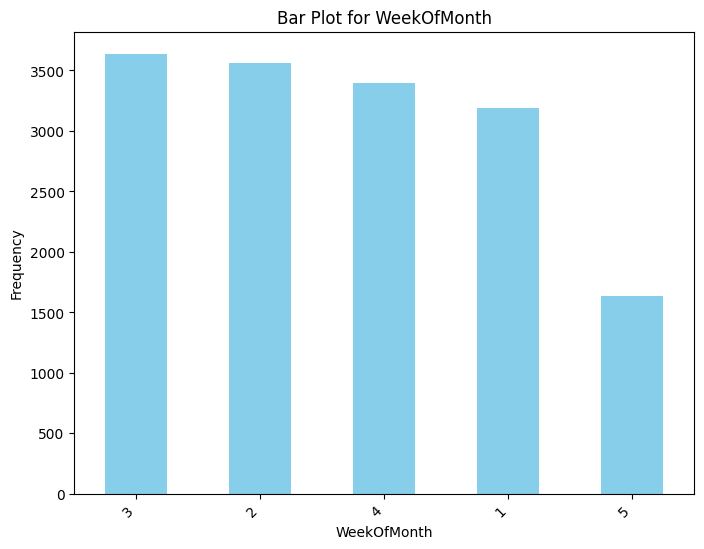

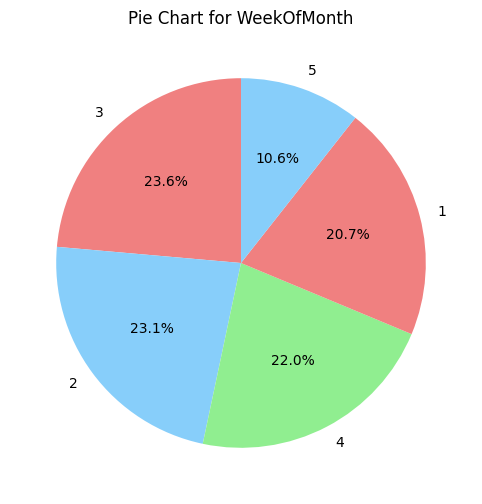

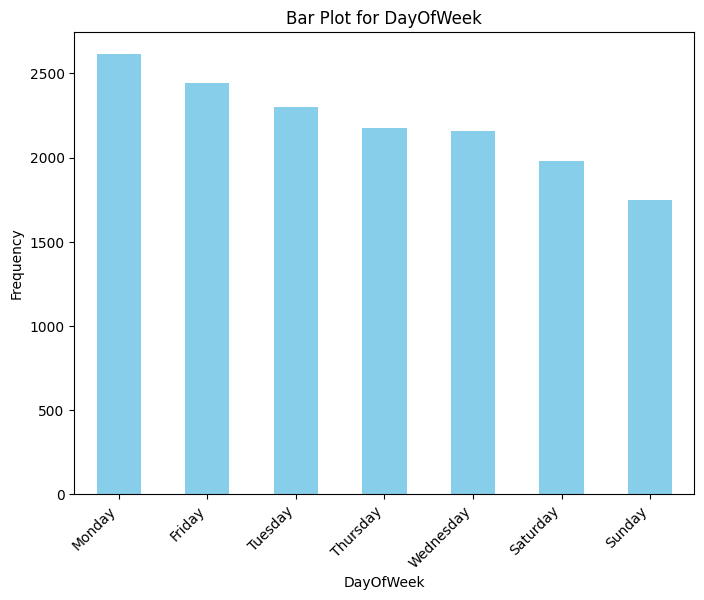

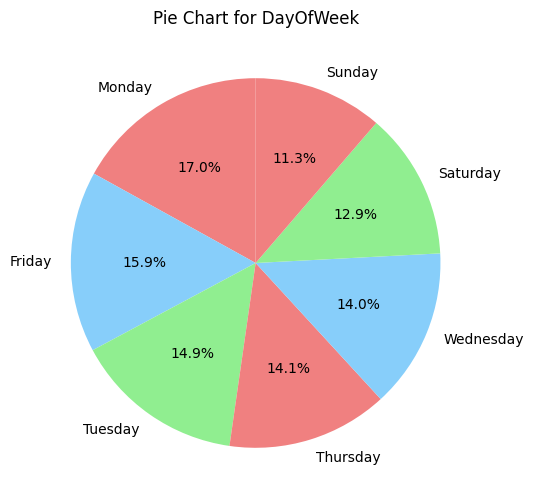

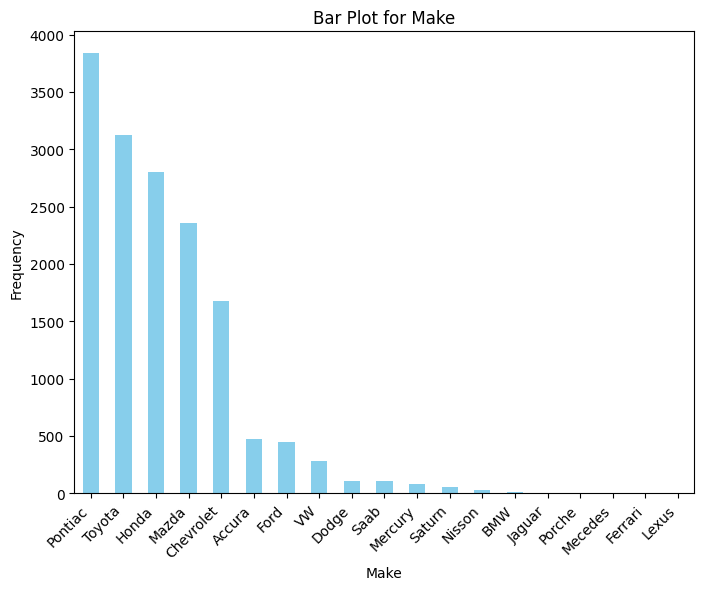

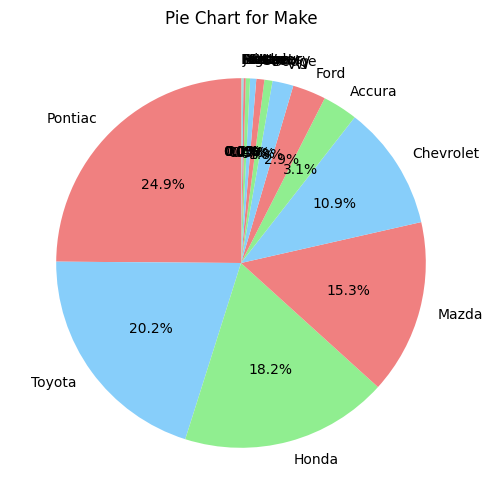

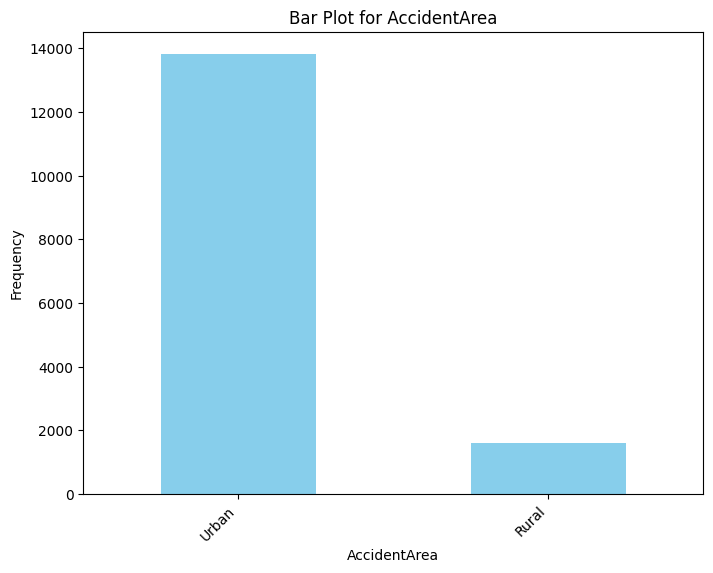

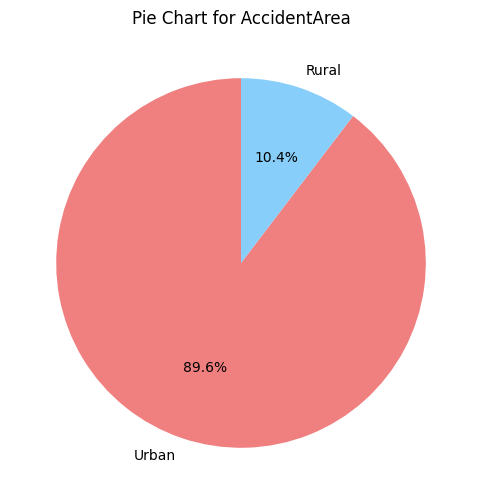

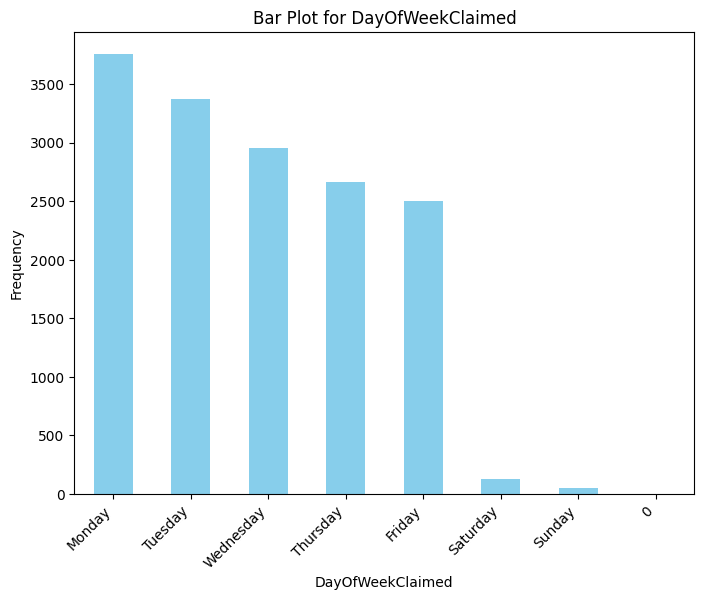

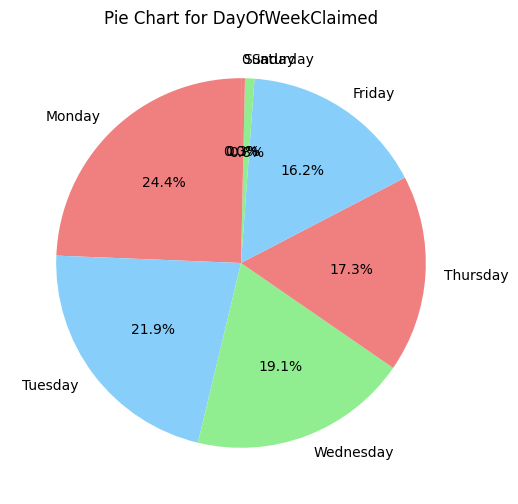

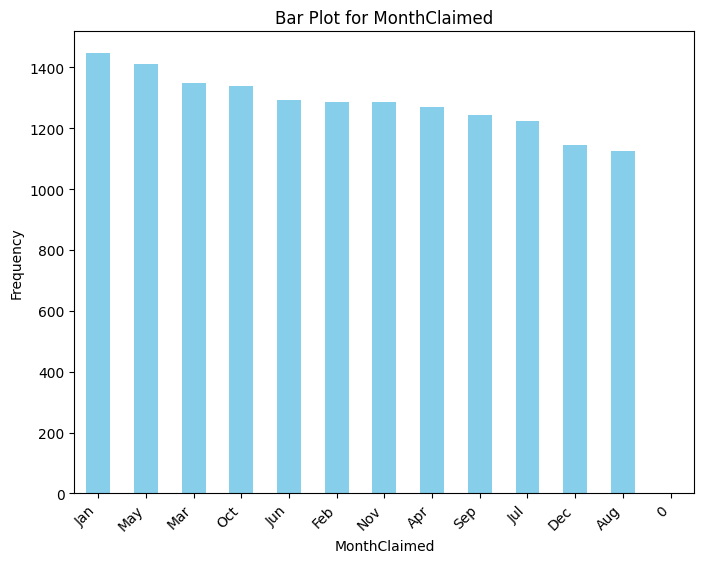

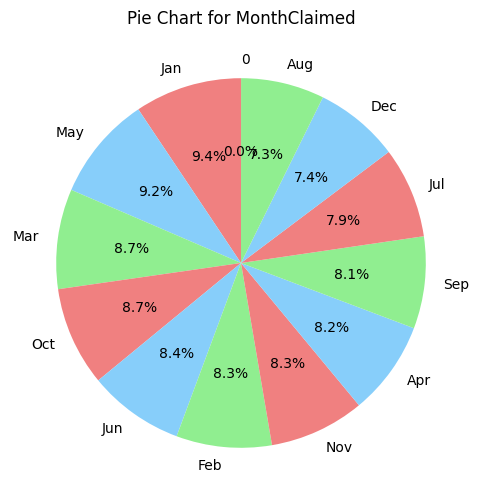

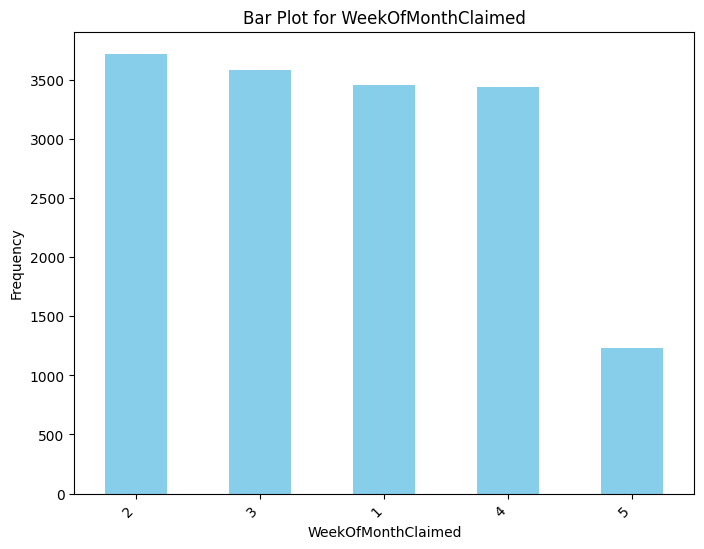

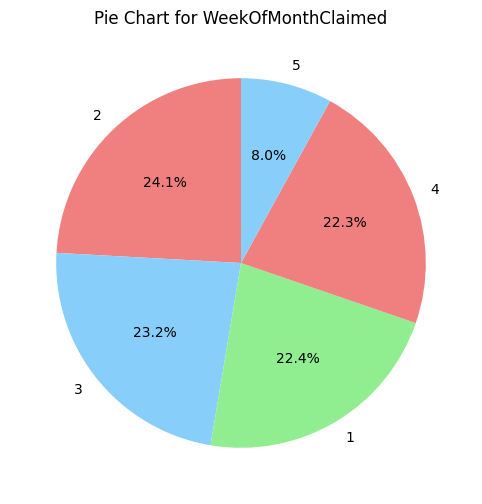

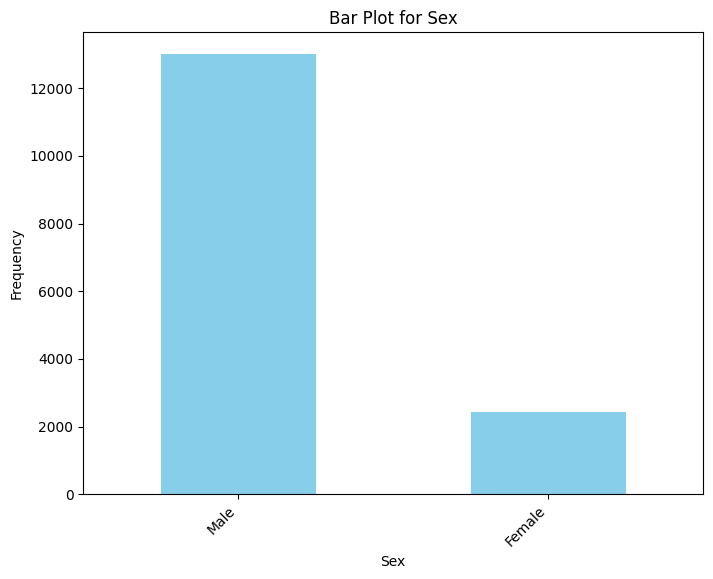

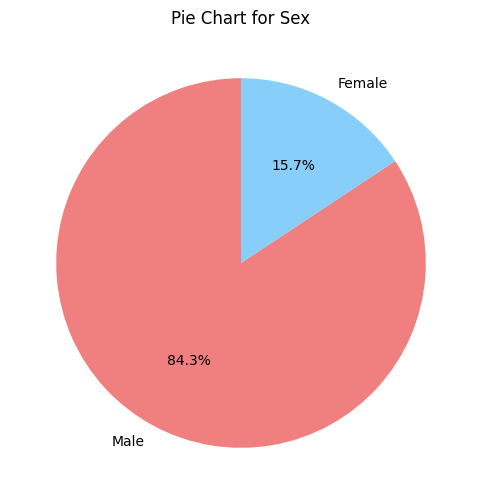

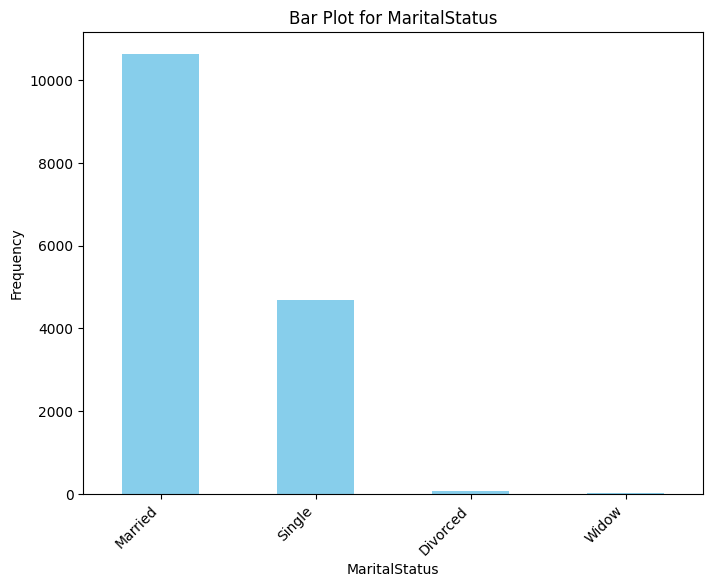

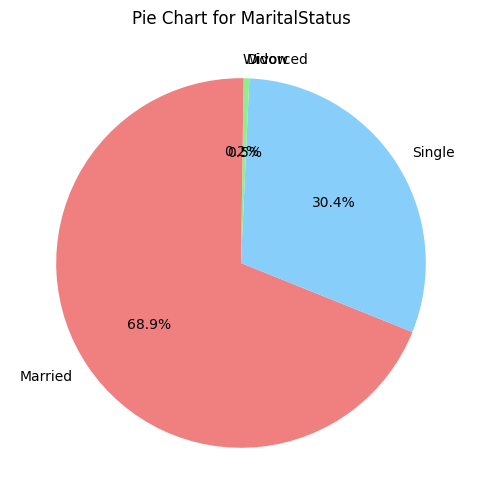

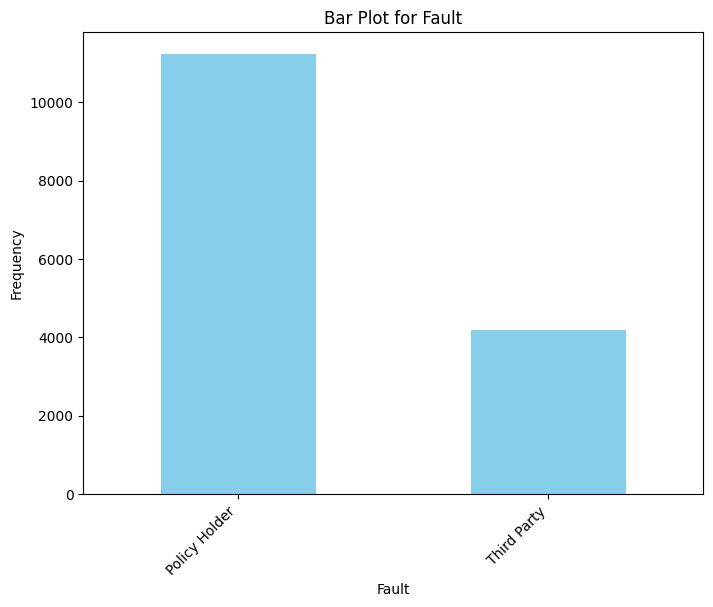

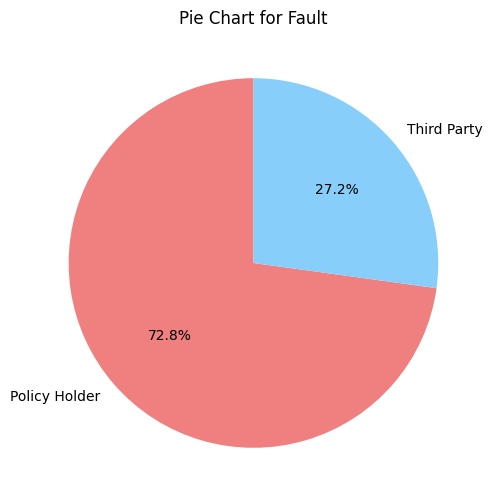

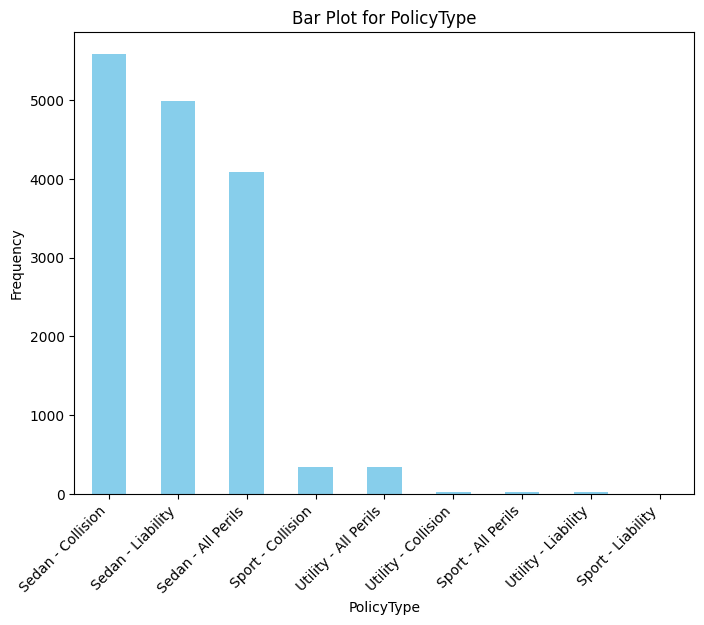

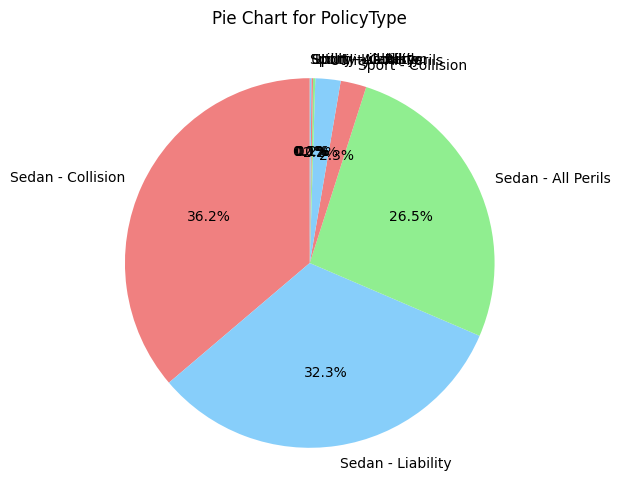

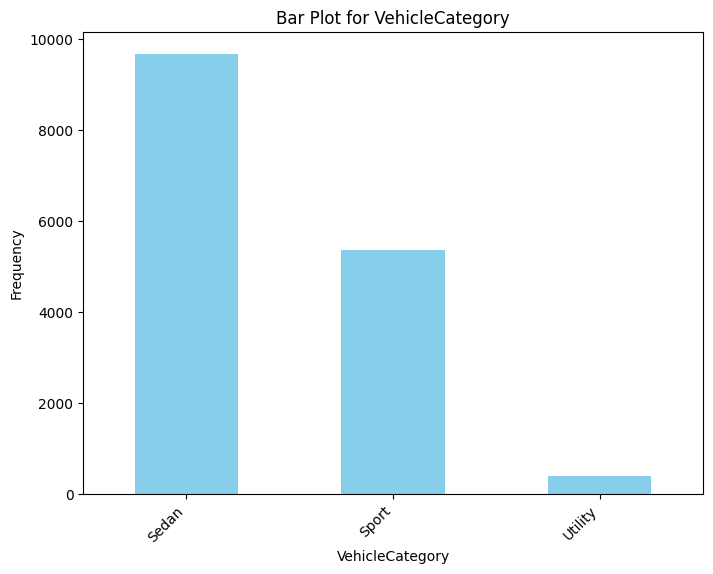

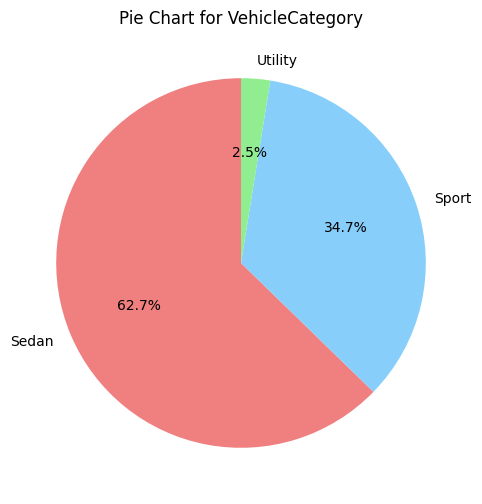

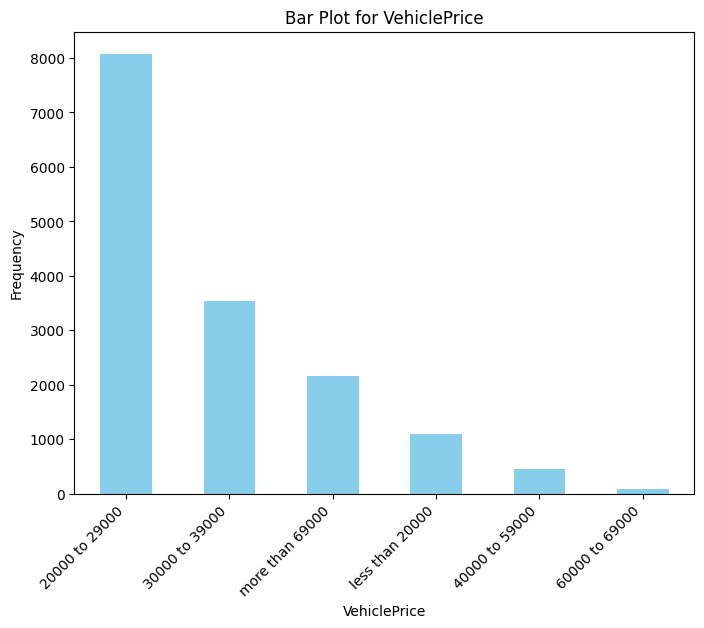

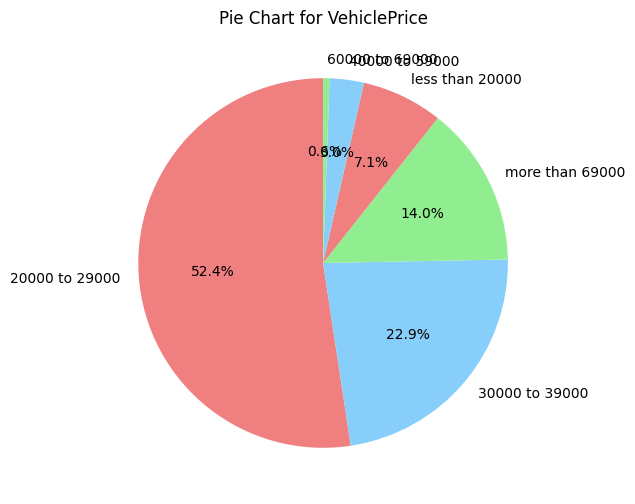

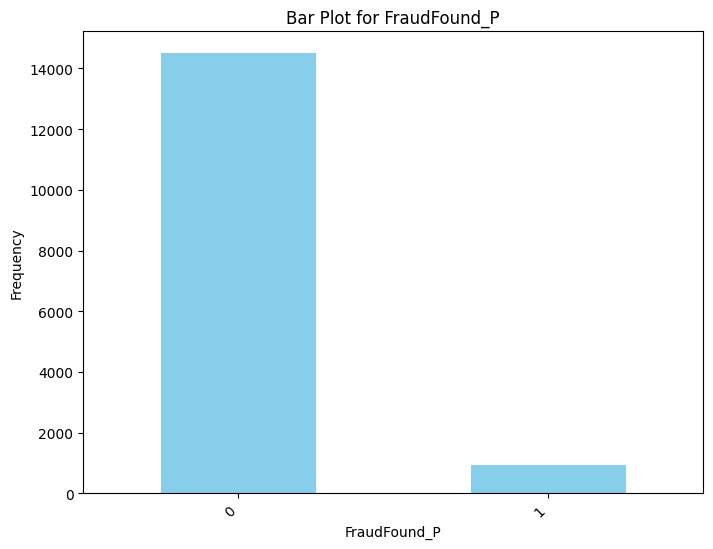

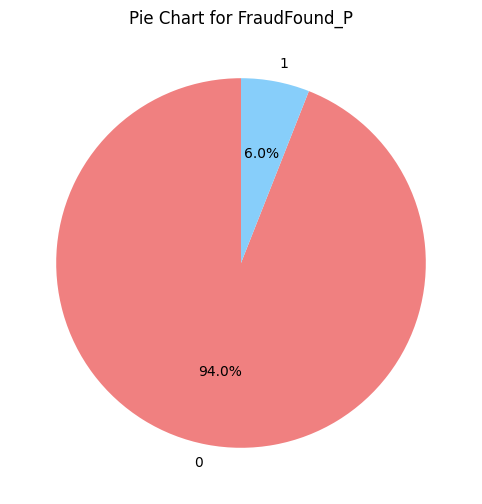

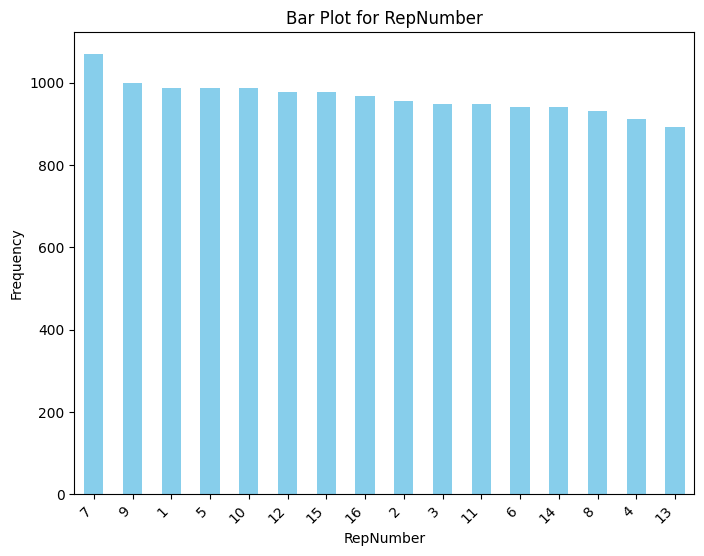

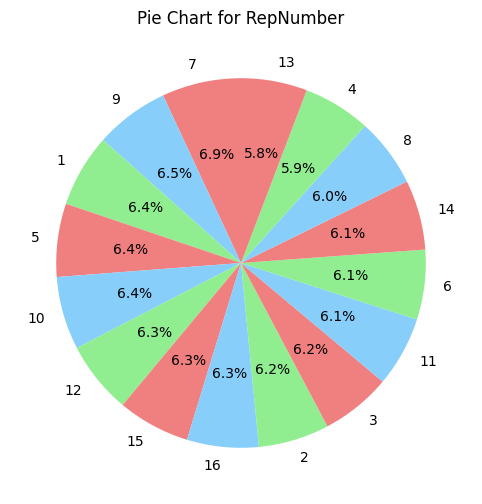

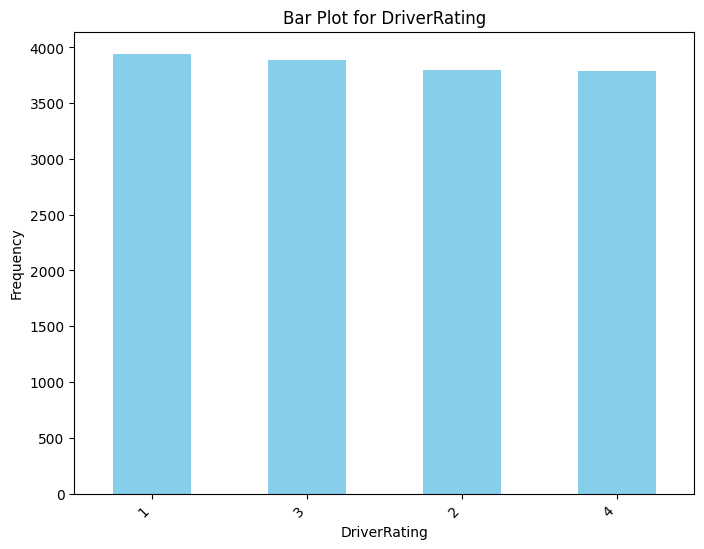

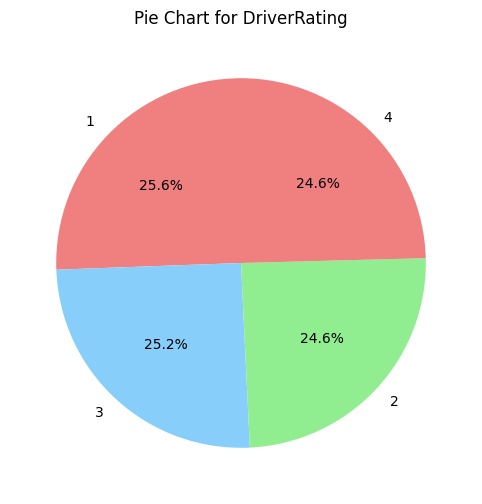

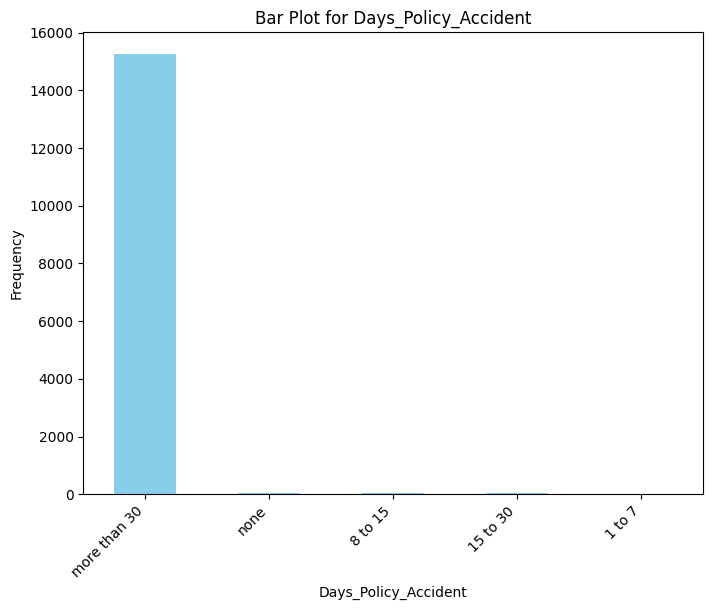

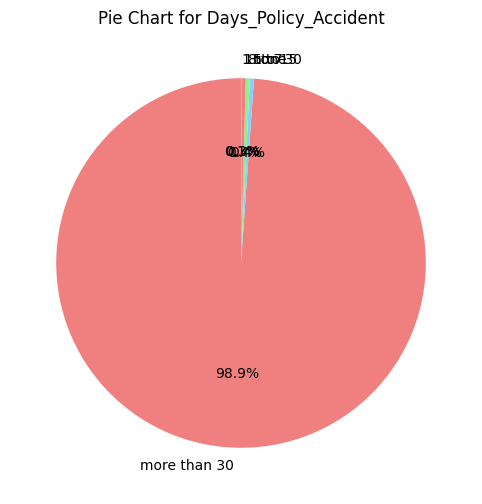

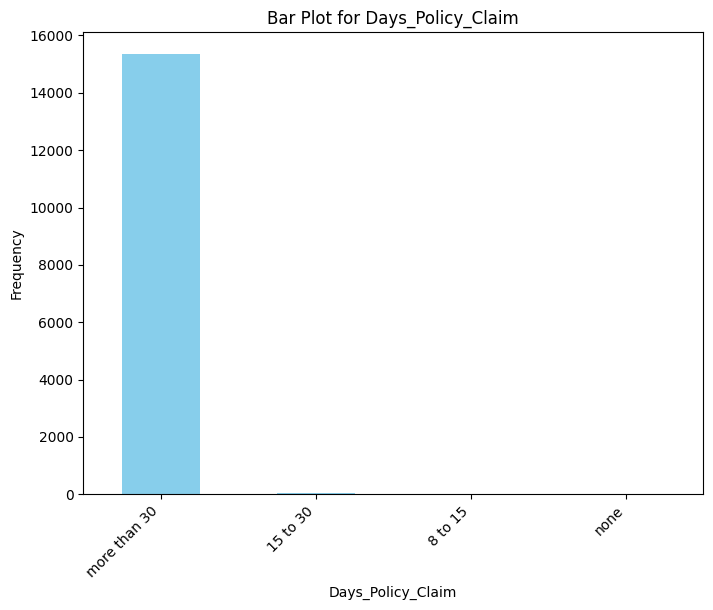

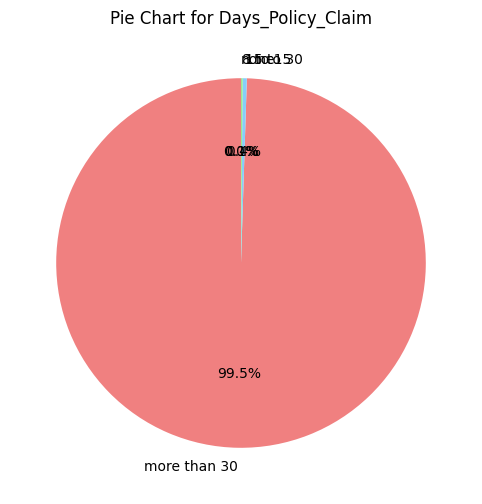

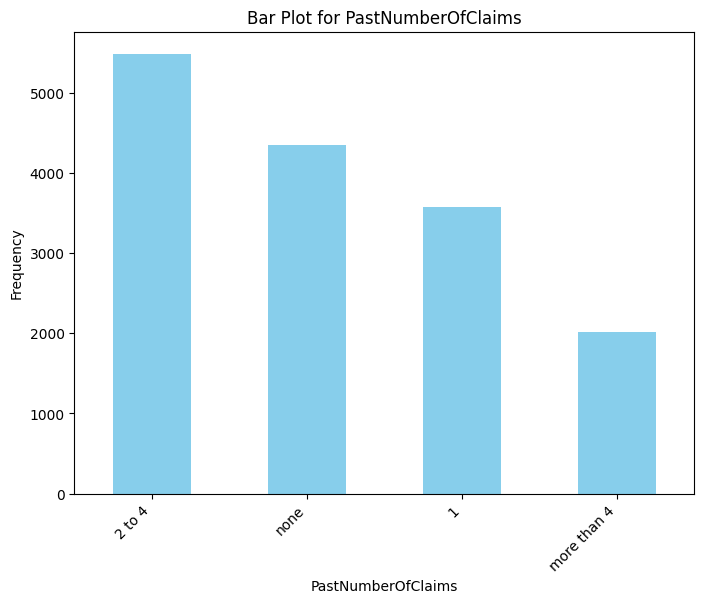

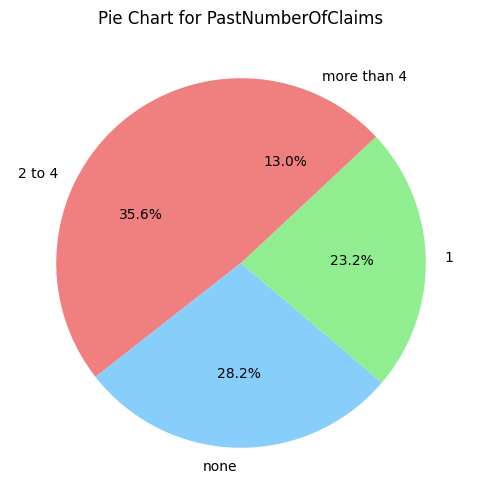

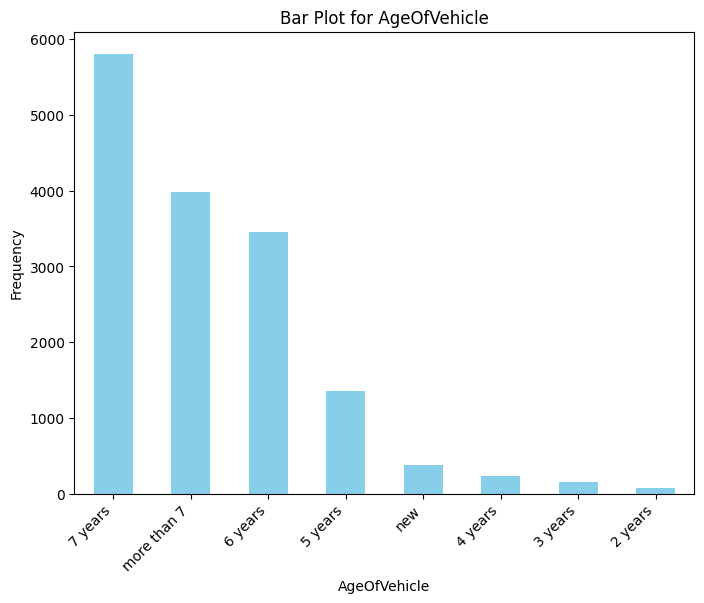

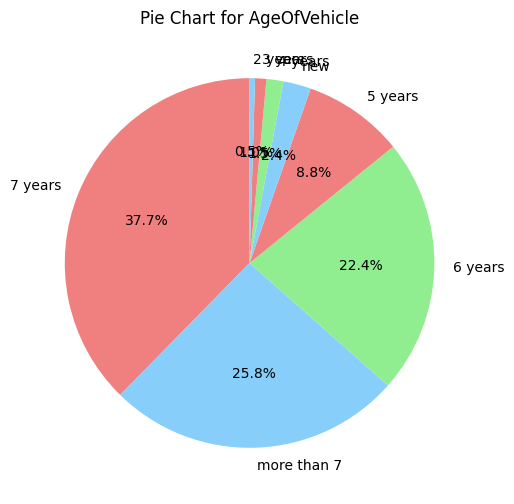

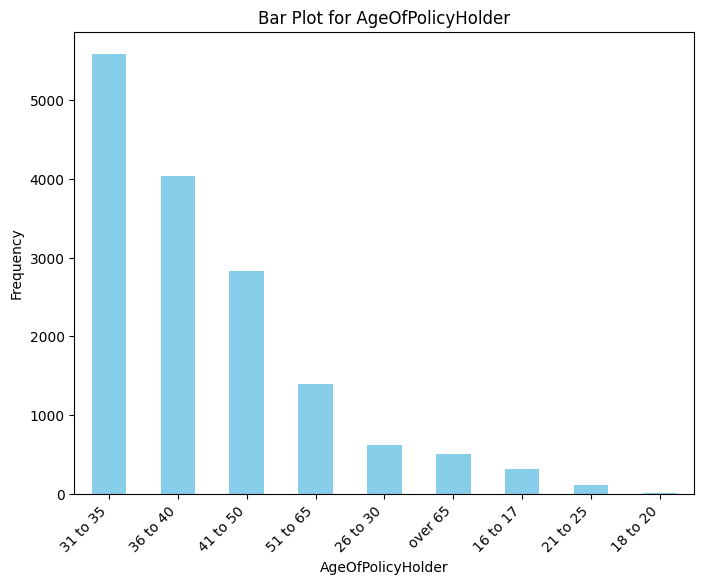

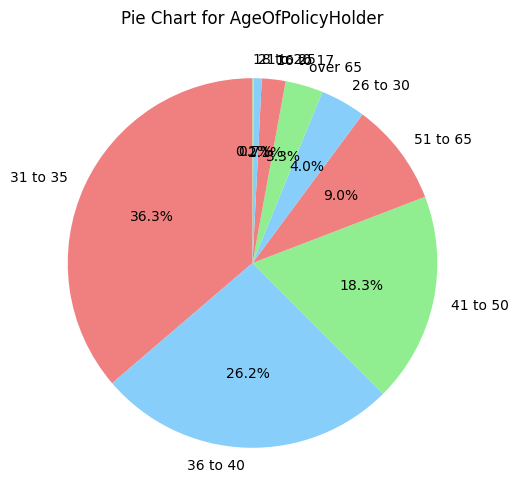

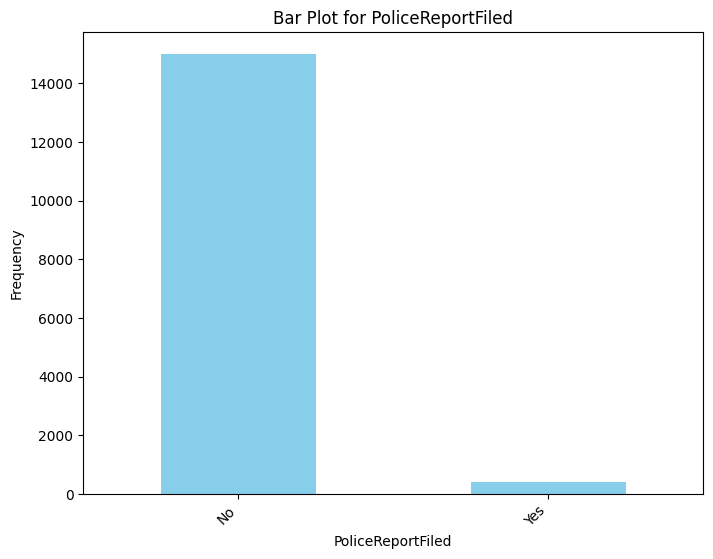

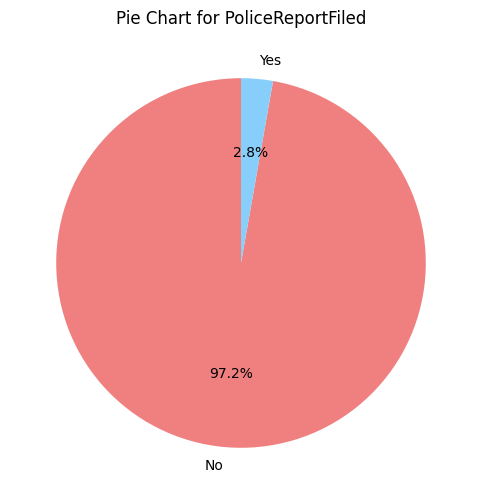

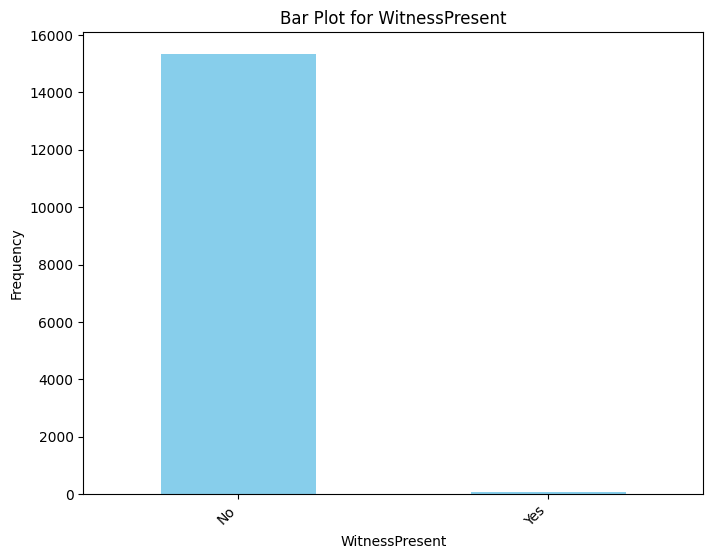

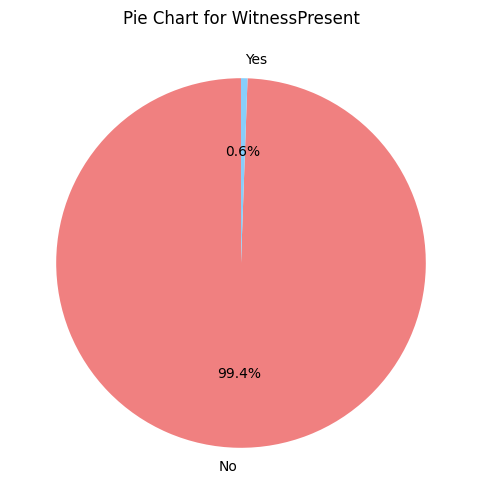

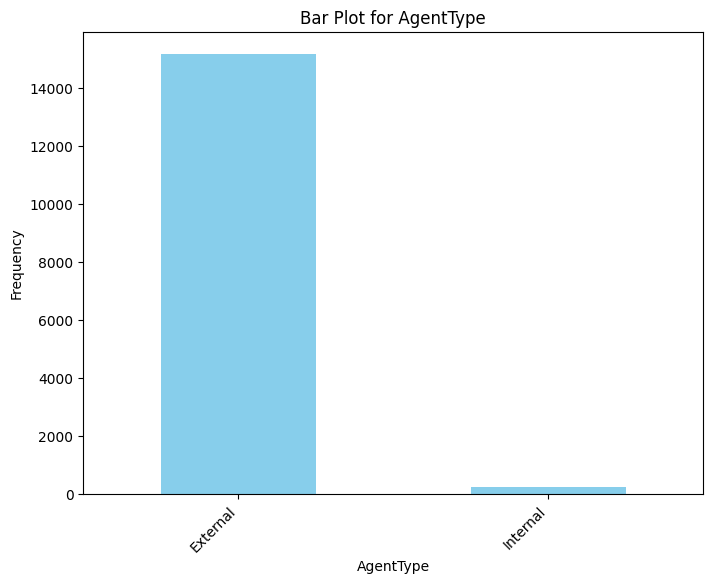

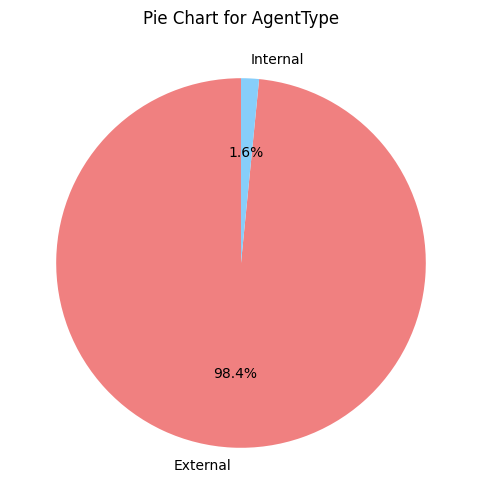

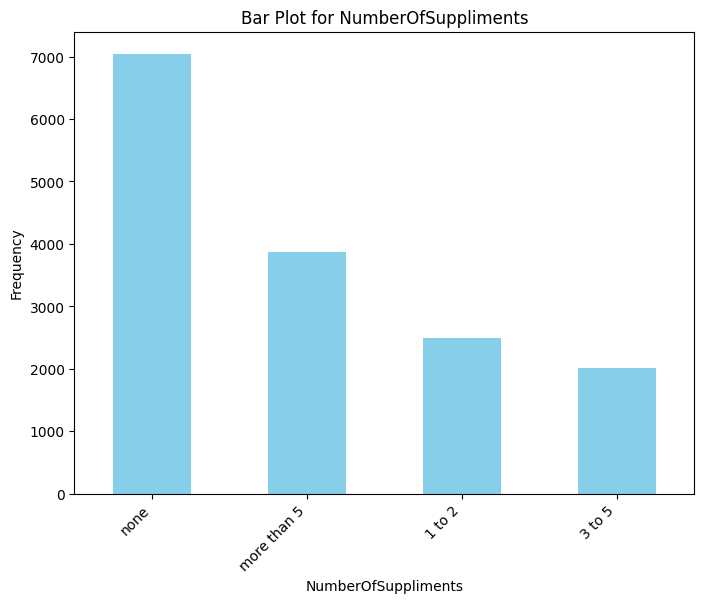

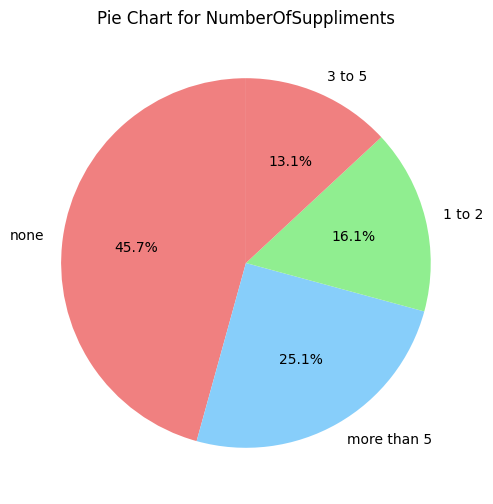

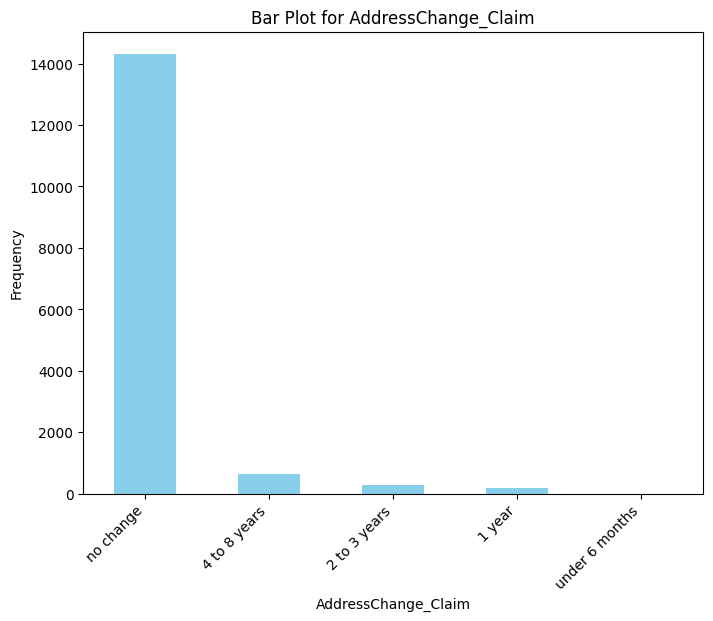

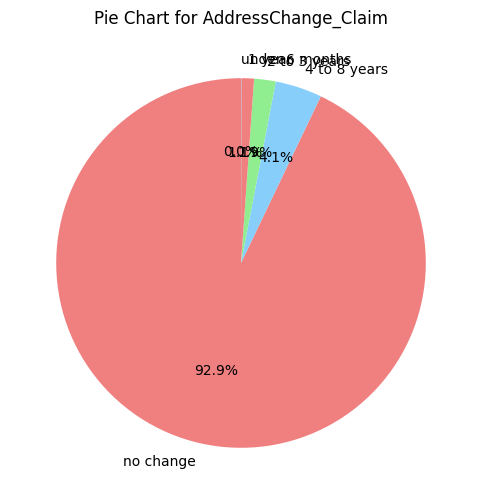

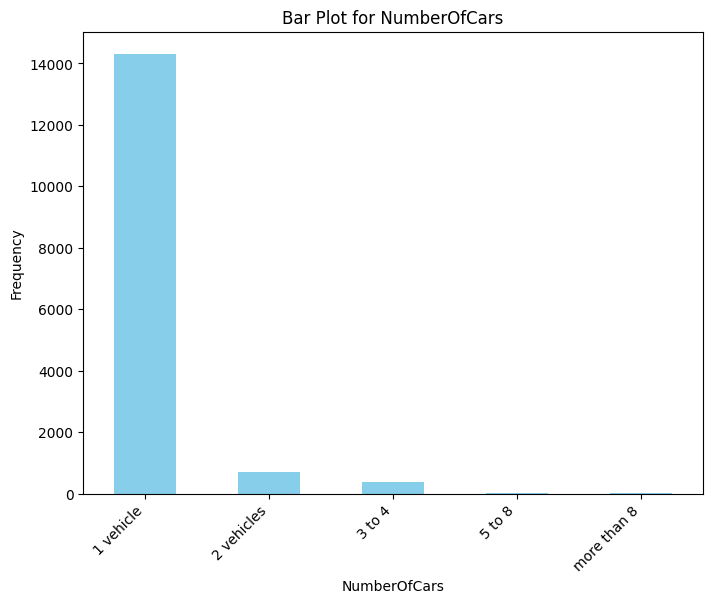

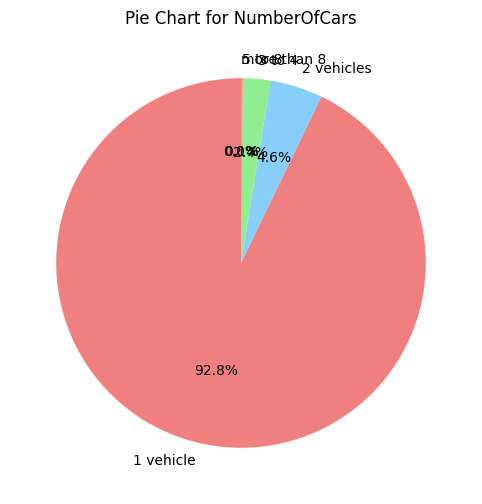

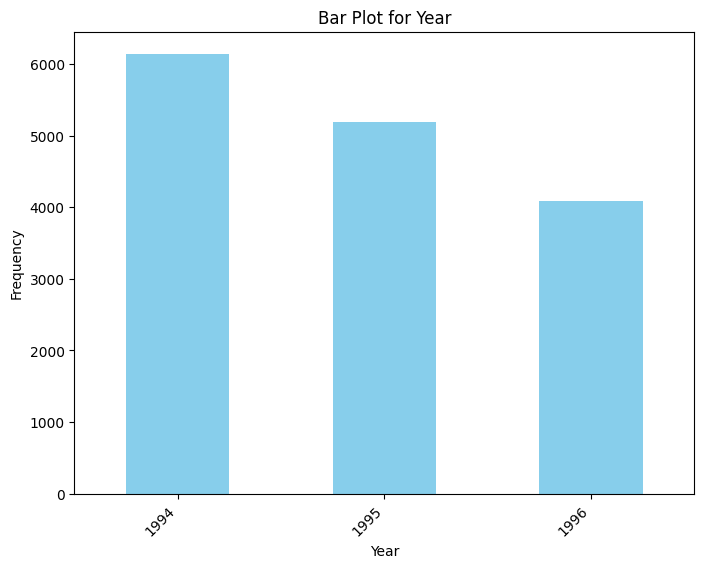

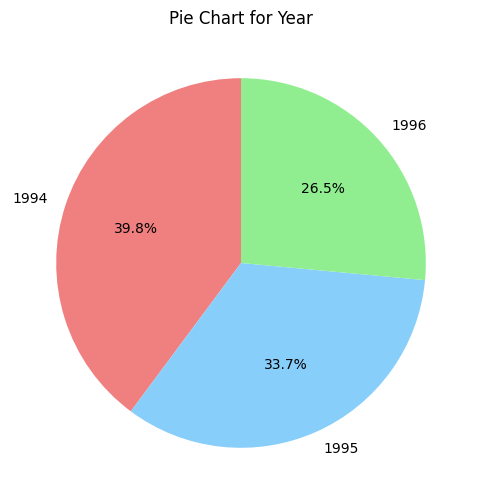

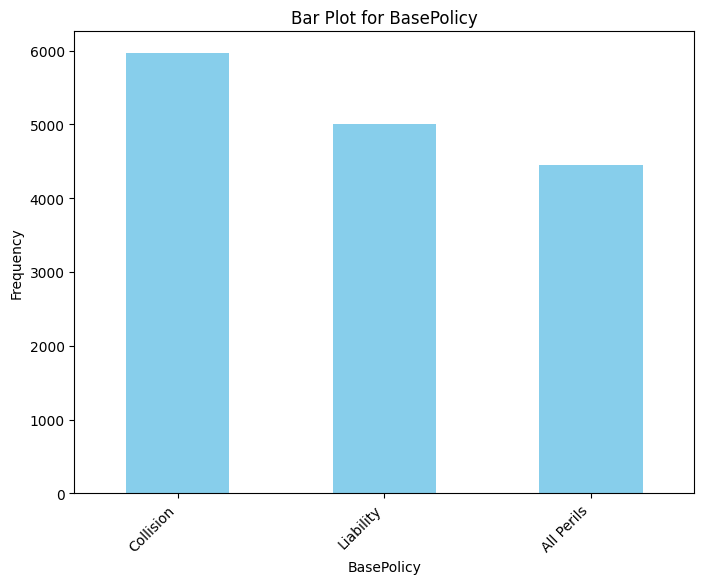

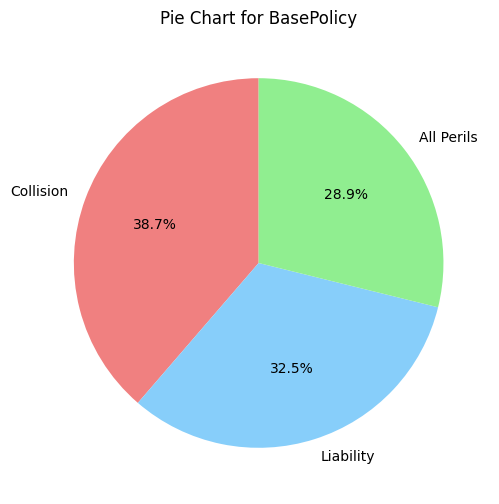

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar(df, column):
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_pie(df, column):
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()

for i in Categorical_Variables:
  plot_bar(df, i)
  plot_pie(df, i)

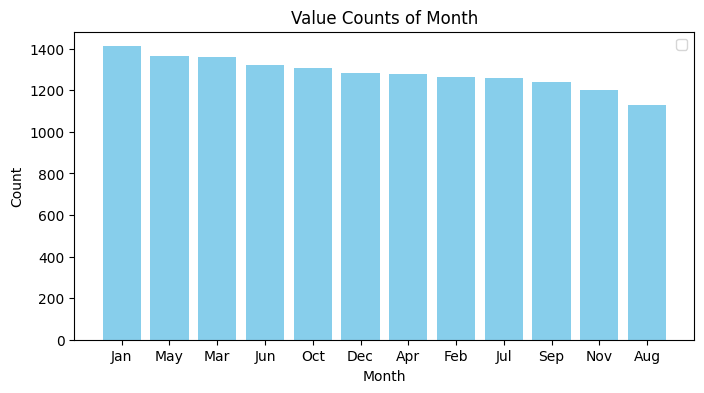

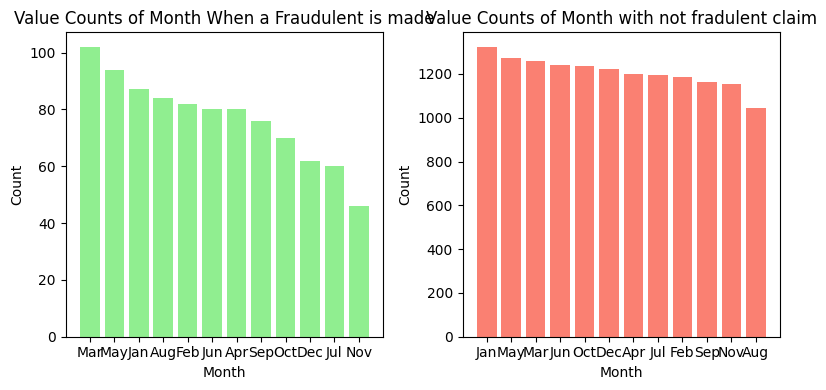

In [19]:

value_counts = df['Month'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Value Counts of Month')
plt.legend()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

value_counts = Fraud_data['Month'].value_counts()

axs[0].bar(value_counts.index, value_counts.values,color='lightgreen')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].set_title('Value Counts of Month When a Fraudulent is made')



value_counts = No_Fraud_data['Month'].value_counts()

axs[1].bar(value_counts.index, value_counts.values,color='salmon')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')
axs[1].set_title('Value Counts of Month with not fradulent claim')


plt.tight_layout()
plt.show()

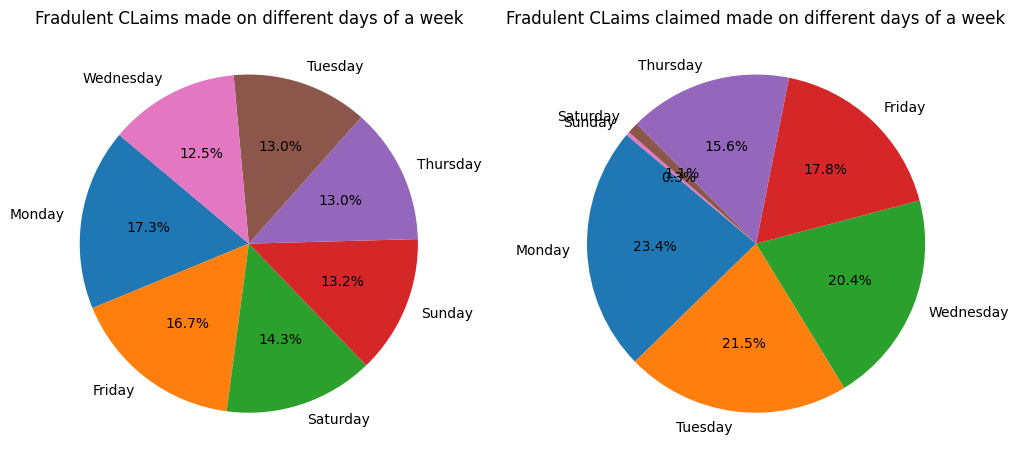

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
value_counts = Fraud_data['DayOfWeek'].value_counts()


axs[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

axs[0].set_title('Fradulent CLaims made on different days of a week')

value_counts = Fraud_data['DayOfWeekClaimed'].value_counts()


axs[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

axs[1].set_title('Fradulent CLaims claimed made on different days of a week')

plt.show()

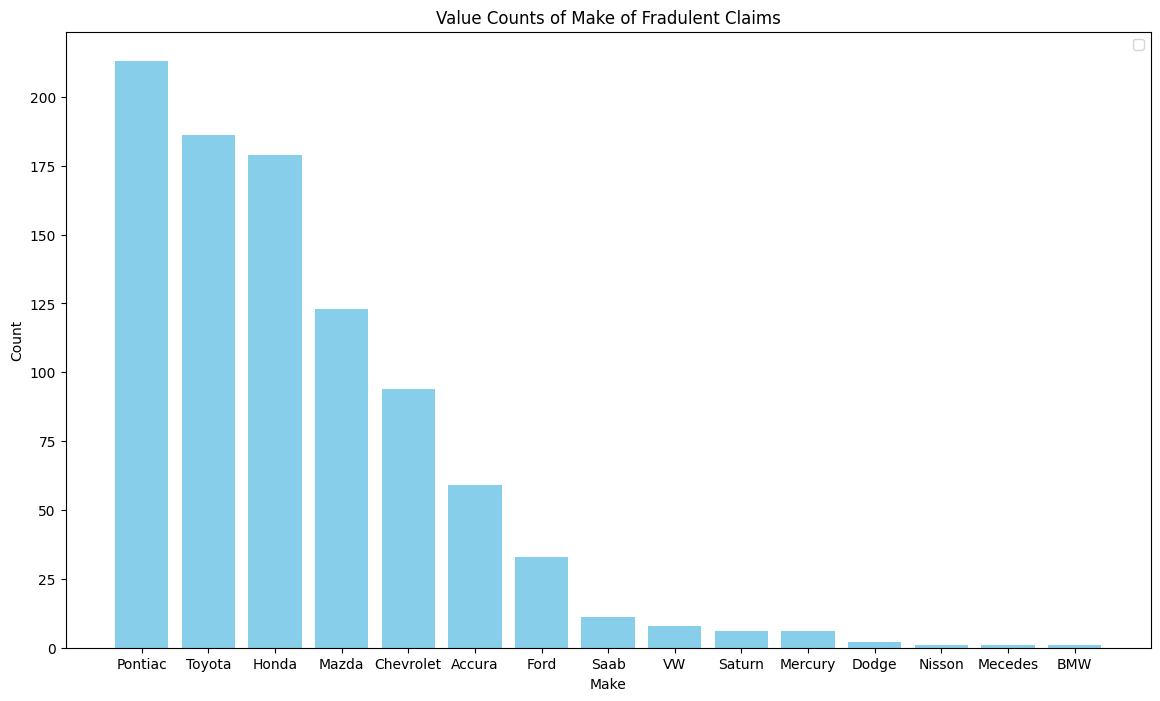

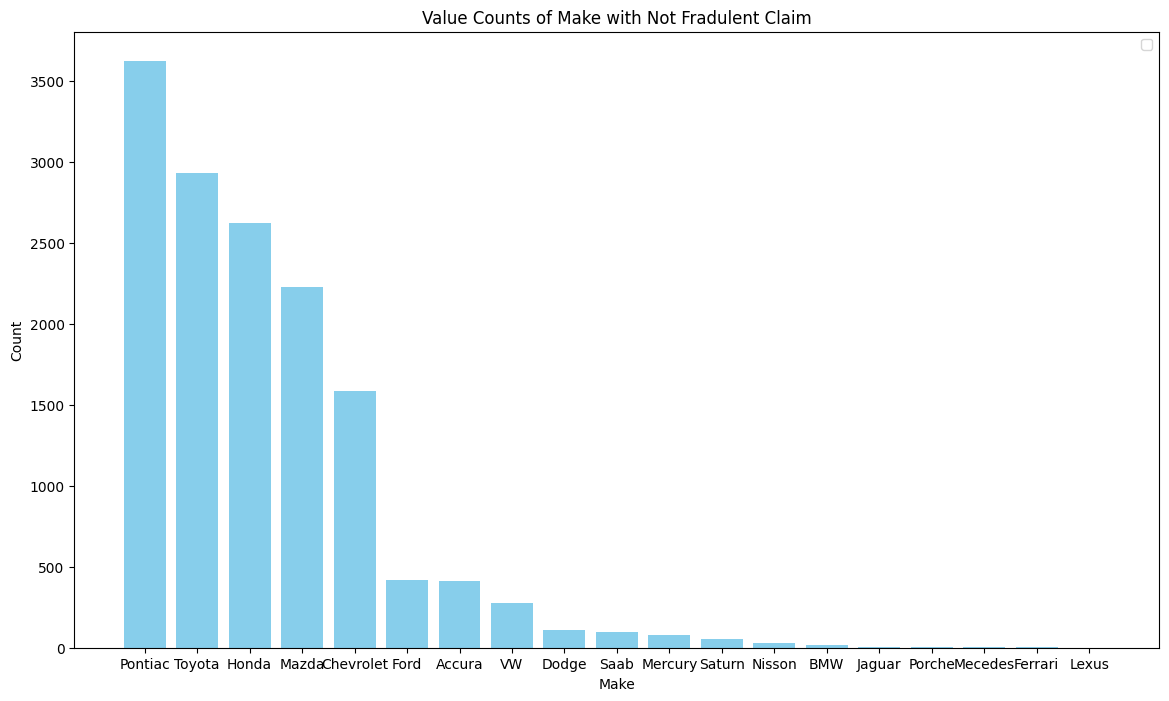

In [21]:

value_counts = Fraud_data['Make'].value_counts()
plt.figure(figsize=(14, 8))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Make of Fradulent Claims')
plt.legend()

value_counts = No_Fraud_data['Make'].value_counts()
plt.figure(figsize=(14, 8))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Make with Not Fradulent Claim')
plt.legend()

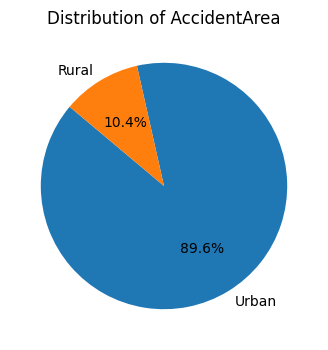

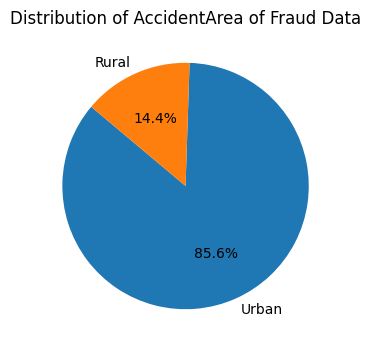

In [22]:
value_counts = df['AccidentArea'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AccidentArea')
plt.show()

value_counts = Fraud_data['AccidentArea'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AccidentArea of Fraud Data')
plt.show()

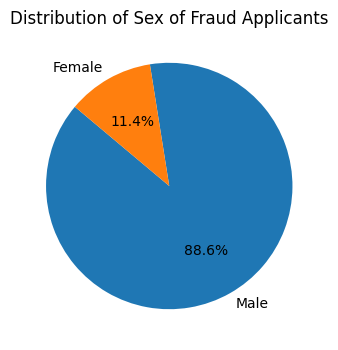

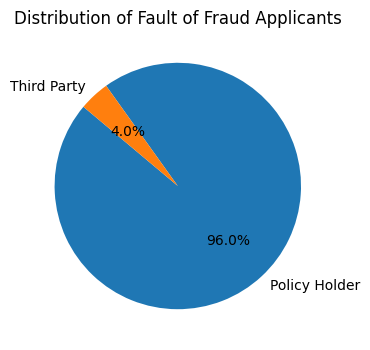

In [23]:
value_counts = Fraud_data['Sex'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex of Fraud Applicants')
plt.show()

value_counts = Fraud_data['Fault'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fault of Fraud Applicants')
plt.show()

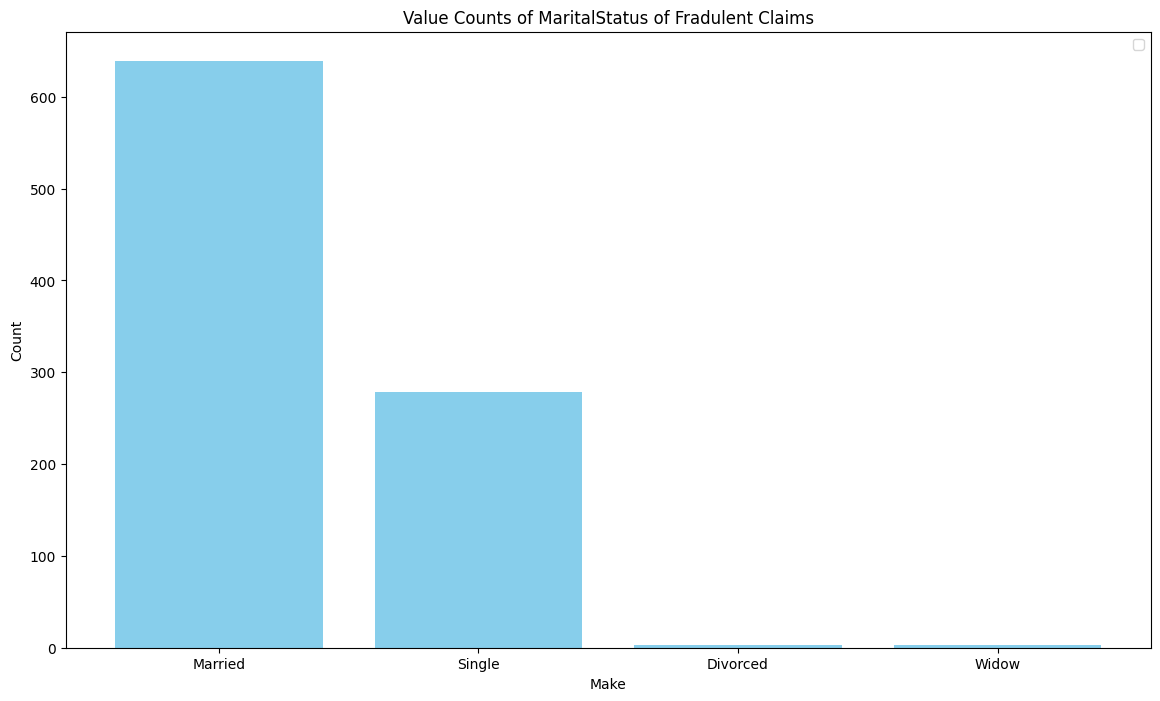

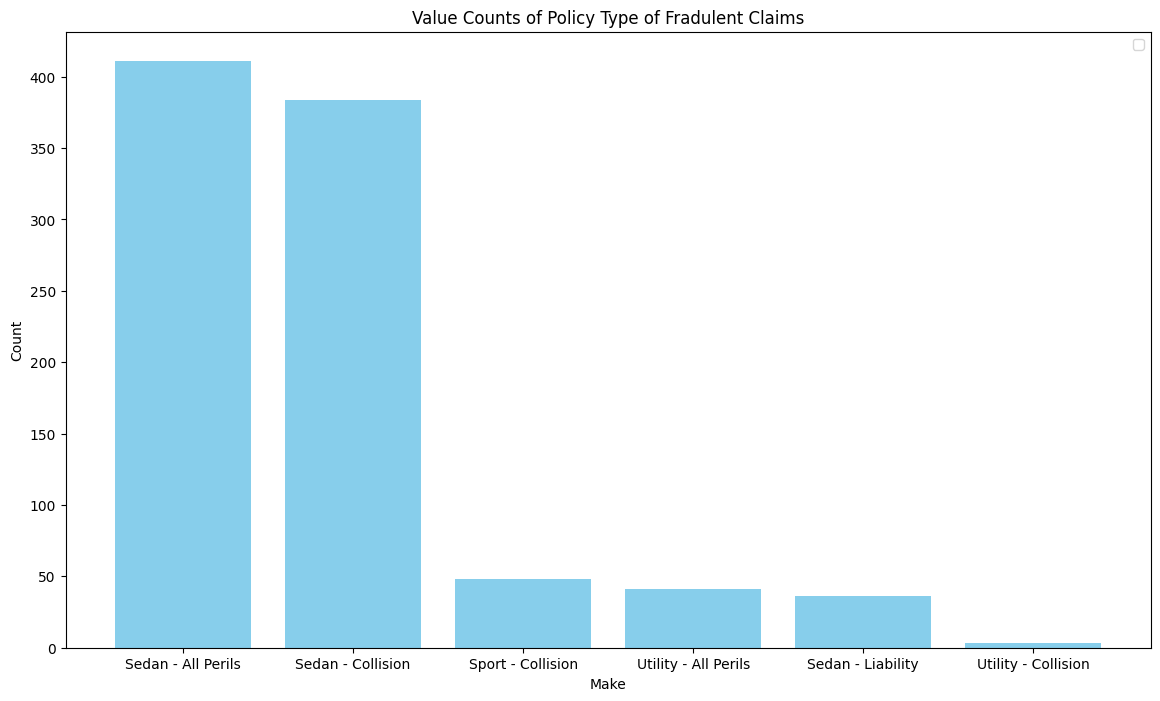

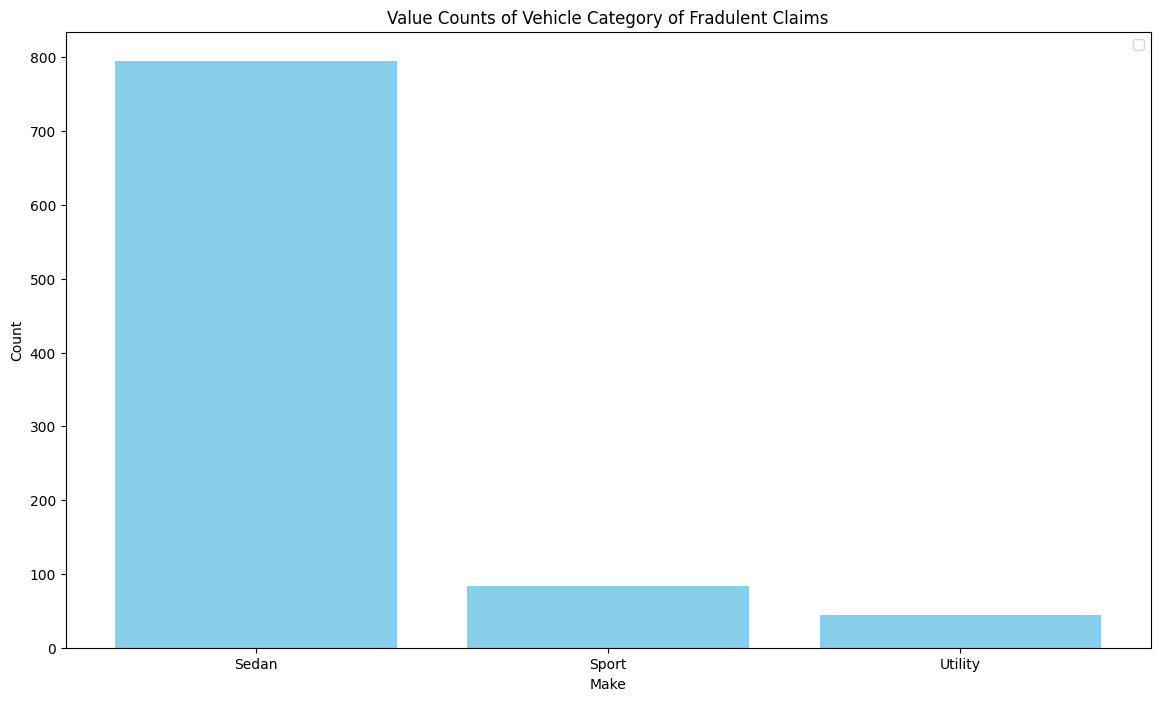

In [24]:
value_counts = Fraud_data['MaritalStatus'].value_counts()
plt.figure(figsize=(14, 8))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of MaritalStatus of Fradulent Claims')
plt.legend()

value_counts = Fraud_data['PolicyType'].value_counts()
plt.figure(figsize=(14, 8))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Policy Type of Fradulent Claims')
plt.legend()

value_counts = Fraud_data['VehicleCategory'].value_counts()
plt.figure(figsize=(14, 8))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Vehicle Category of Fradulent Claims')
plt.legend()

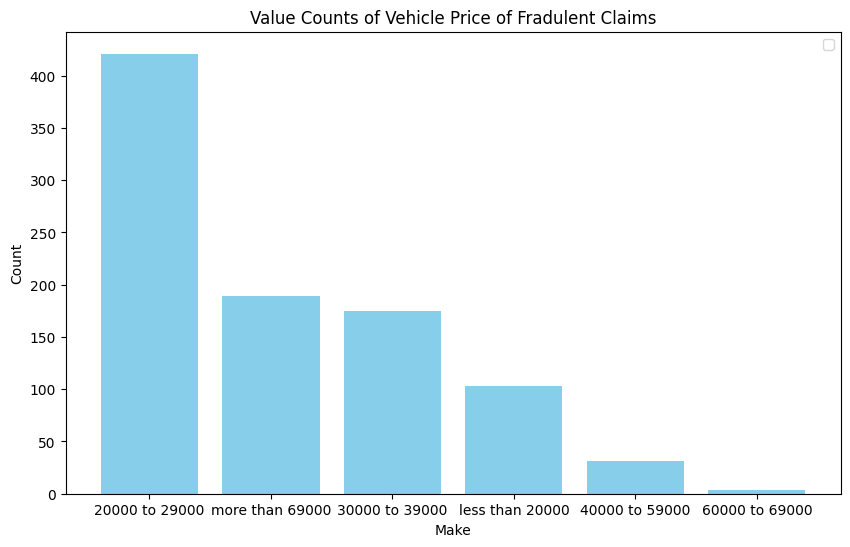

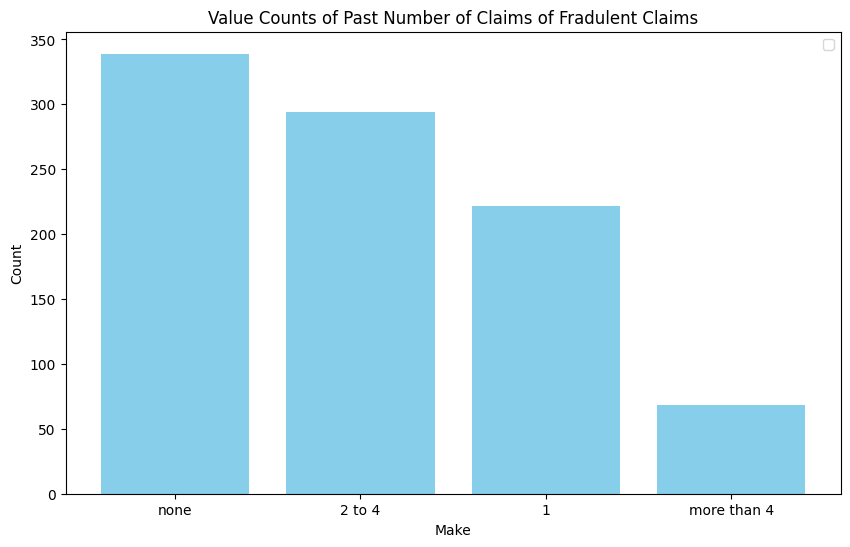

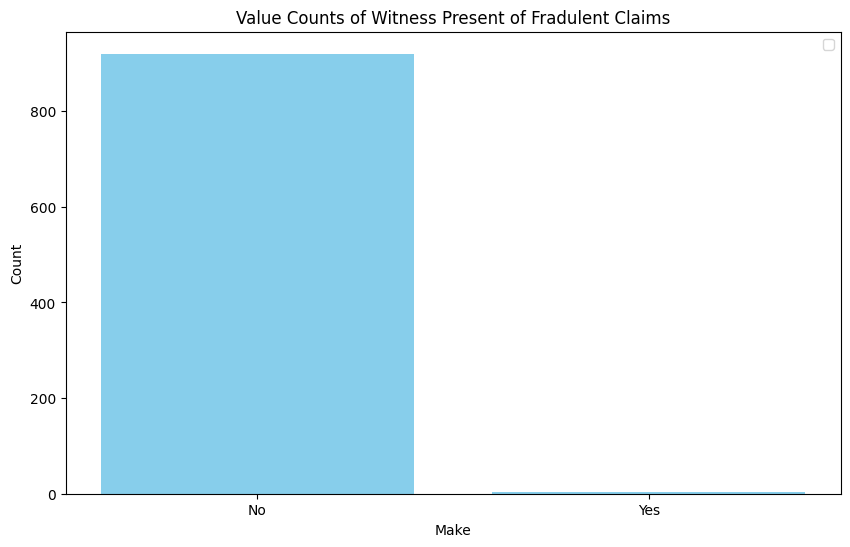

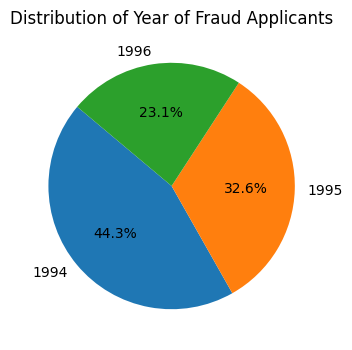

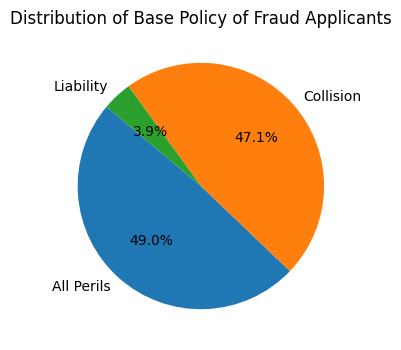

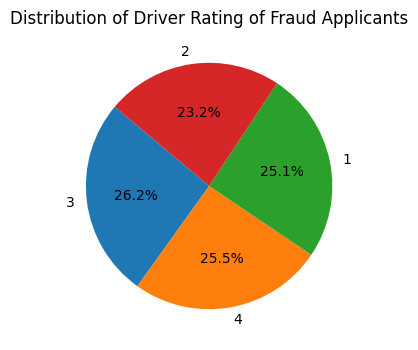

In [25]:
value_counts = Fraud_data['VehiclePrice'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Vehicle Price of Fradulent Claims')
plt.legend()

value_counts = Fraud_data['PastNumberOfClaims'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Past Number of Claims of Fradulent Claims')
plt.legend()

value_counts = Fraud_data['WitnessPresent'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Witness Present of Fradulent Claims')
plt.legend()

value_counts = Fraud_data['Year'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Year of Fraud Applicants')
plt.show()

value_counts = Fraud_data['BasePolicy'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Base Policy of Fraud Applicants')
plt.show()

value_counts = Fraud_data['DriverRating'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Driver Rating of Fraud Applicants')
plt.show()

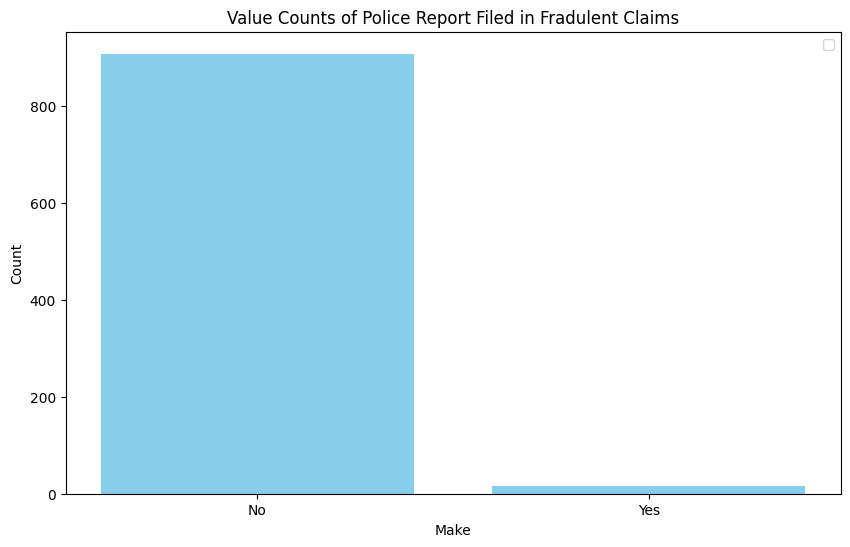

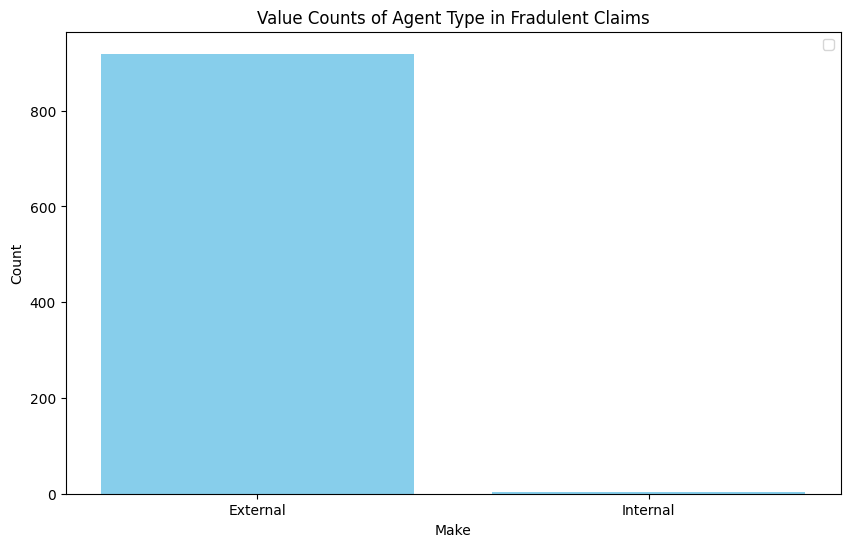

In [26]:
value_counts = Fraud_data['PoliceReportFiled'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Police Report Filed in Fradulent Claims')
plt.legend()

value_counts = Fraud_data['AgentType'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values,color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Value Counts of Agent Type in Fradulent Claims')
plt.legend()


# Some of the observations made by doing EDA

1.   The highest number of fradulent claims are made in March and the day is Monday.
2.   Urban Areas have seen 89% claims and 85% of Fraud claims.
3.   Most of the Fradulent cases are from Male holders and most of the time the fault is of the policy Holder.
4.   One of the best predictor to use in here will be Witness and Police Report as 95% of Fraud cases does not have an Witness and no report is filed at the police.
5.  1994 constitutes about 44% of Fraud Cases.
6. Almost 99% of Fraud Cases have an external Agent.








In [27]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_corr = df.copy()

for i in Categorical_Variables:
    df_corr[i] = label_encoder.fit_transform(df[i])


In [28]:
df_corr.corr()
import seaborn as sns

fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(df_corr.corr(), annot = True, fmt = '.2f')

<Axes: >

Even though the correlation Matrix may not be useful in Classification Problems. It Might still help in finding out highly correlated variables such as Month and MonthClaimed. THis further helps in feature selection.

# **Data Preprocessing**

### Let us now convert all categorical variables to numerical variables.

In [29]:
df.info()
df_ori=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

#**Converting all binary and ordinal categorical variables into numerical variables using Label Encoder**

In [30]:
label_encoder = LabelEncoder()

# Convert categorical columns to numerical values
for col in Categorical_Variables_1:
    df[col] = label_encoder.fit_transform(df[col])

# Print the transformed dataframe
df.head()

Month  WeekOfMonth  DayOfWeek    Make  AccidentArea  DayOfWeekClaimed  \
0      2            4          6   Honda             1                 6   
1      4            2          6   Honda             1                 2   
2     10            4          0   Honda             1                 5   
3      6            1          2  Toyota             0                 1   
4      4            4          1   Honda             1                 6   

   MonthClaimed  WeekOfMonthClaimed  Sex MaritalStatus  ...  AgeOfVehicle  \
0             5                   0    0        Single  ...             1   
1             5                   3    1        Single  ...             4   
2            10                   1    1       Married  ...             5   
3             6                   0    1       Married  ...             6   
4             4                   1    0        Single  ...             3   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent  AgentType  \
0                  3                 0              0          0   
1                  4                 1              0          0   
2                  6                 0              0          0   
3                  7                 1              0          0   
4                  4                 0              0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                    3               1 year             2     0   Liability  
1                    3            no change             0     0   Collision  
2                    3            no change             0     0   Collision  
3                    2            no change             0     0   Liability  
4                    3            no change             0     0   Collision  

[5 rows x 33 columns]

#**Converting all Categorical Nominal Variables into numerical variables using get_dummies**

In [31]:
df_final = pd.get_dummies(df, columns=Nominal_Variables,dtype=int)


In [32]:
df=df_final.copy()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 95 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Month                               15420 non-null  int64
 1   WeekOfMonth                         15420 non-null  int64
 2   DayOfWeek                           15420 non-null  int64
 3   AccidentArea                        15420 non-null  int64
 4   DayOfWeekClaimed                    15420 non-null  int64
 5   MonthClaimed                        15420 non-null  int64
 6   WeekOfMonthClaimed                  15420 non-null  int64
 7   Sex                                 15420 non-null  int64
 8   Age                                 15420 non-null  int64
 9   Fault                               15420 non-null  int64
 10  VehiclePrice                        15420 non-null  int64
 11  FraudFound_P                        15420 non-null  int64
 12  Poli

## Removing few columns based on domain knowledge and correlation -
  Month,WeekOfMonth,DayOfWeek,PolicyNumber,Age,BasePolicy,Year,AddressChange_Claim
  

In [34]:

columns_to_remove = ['Month', 'WeekOfMonth', 'DayOfWeek', 'PolicyNumber']

df = df.drop(columns=columns_to_remove)
df.columns


Index(['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'VehiclePrice',
       'FraudFound_P', 'Deductible', 'DriverRating', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'AddressChange_Claim_1 year', 'AddressChange_Claim_2 to 3 years',
       'AddressChange_Claim_4 to 8 years', 'AddressChange_Claim_no change',
       'AddressChange_Claim_under 6 months', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability',
       'Days_Policy_Accident_1 to 7', 'Days_Policy_Accident_15 to 30',
       'Days_Policy_Accident_8 to 15', 'Days_Policy_Accident_more than 30',
       'Days_Policy_Accident_none', 'Days_Policy_Claim_15 to 30',
       'Days_Policy_Claim_8 to 15', 'Days_Policy_Claim_more than 30',
       'Days_Policy_Claim_none', 'Make_Accura', 'Make_BMW', 'Make_Chevrolet',
       'Make_Dodge', 'Make_Ferrari'

#**After running logistic classification for a few times and examining the results, we decided to drop few more columns**

In [35]:
columns_to_remove = ['VehicleCategory_Sport', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'VehicleCategory_Sedan',
       'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils',
       'RepNumber_12', 'RepNumber_16', 'RepNumber_11',
       'PolicyType_Utility - Liability', 'RepNumber_14', 'RepNumber_1',
       'RepNumber_2', 'RepNumber_3', 'RepNumber_13', 'RepNumber_4',
       'RepNumber_5', 'RepNumber_7', 'RepNumber_8',
       'PastNumberOfClaims_more than 4', 'RepNumber_9', 'RepNumber_15',
       'Make_Mecedes', 'MaritalStatus_Widow', 'Days_Policy_Claim_none',
       'WitnessPresent', 'AddressChange_Claim_1 year',
       'AddressChange_Claim_4 to 8 years', 'AddressChange_Claim_no change',
       'AddressChange_Claim_under 6 months', 'BasePolicy_Collision',
       'Days_Policy_Accident_1 to 7', 'Days_Policy_Accident_15 to 30',
       'Days_Policy_Accident_8 to 15', 'Days_Policy_Accident_more than 30',
       'Days_Policy_Claim_15 to 30', 'Days_Policy_Claim_8 to 15',
       'Make_Accura', 'MaritalStatus_Divorced', 'Make_BMW', 'Make_Dodge',
       'Make_Ferrari', 'Make_Ford', 'Make_Jaguar', 'Make_Lexus',
       'Make_Mercury', 'Make_Nisson', 'Make_Porche', 'Make_Saab',
       'Make_Saturn', 'Make_VW', 'VehicleCategory_Utility']

df = df.drop(columns=columns_to_remove)
df.columns

Index(['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'VehiclePrice',
       'FraudFound_P', 'Deductible', 'DriverRating', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType',
       'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'AddressChange_Claim_2 to 3 years', 'BasePolicy_All Perils',
       'BasePolicy_Liability', 'Days_Policy_Accident_none',
       'Days_Policy_Claim_more than 30', 'Make_Chevrolet', 'Make_Honda',
       'Make_Mazda', 'Make_Pontiac', 'Make_Toyota', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'PastNumberOfClaims_1',
       'PastNumberOfClaims_2 to 4', 'PastNumberOfClaims_none',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - Collision',
       'RepNumber_6', 'RepNumber_10'],
      dtype='object')

In [36]:
columns_to_remove = ['MaritalStatus_Single', 'PastNumberOfClaims_2 to 4',
       'BasePolicy_All Perils', 'PolicyType_Sedan - All Perils', 'Sex',
       'PolicyType_Utility - Collision', 'AgentType']

df = df.drop(columns=columns_to_remove)
df.columns

Index(['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Age', 'Fault', 'VehiclePrice', 'FraudFound_P',
       'Deductible', 'DriverRating', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'AddressChange_Claim_2 to 3 years', 'BasePolicy_Liability',
       'Days_Policy_Accident_none', 'Days_Policy_Claim_more than 30',
       'Make_Chevrolet', 'Make_Honda', 'Make_Mazda', 'Make_Pontiac',
       'Make_Toyota', 'MaritalStatus_Married', 'PastNumberOfClaims_1',
       'PastNumberOfClaims_none', 'PolicyType_Sedan - Collision',
       'PolicyType_Sport - Collision', 'RepNumber_6', 'RepNumber_10'],
      dtype='object')

In [37]:
columns_to_remove =['Deductible', 'Make_Honda', 'Make_Pontiac', 'RepNumber_10',
       'Make_Toyota', 'WeekOfMonthClaimed', 'Make_Mazda', 'Make_Chevrolet',
       'PastNumberOfClaims_1']

df = df.drop(columns=columns_to_remove)
df.columns

Index(['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehiclePrice', 'FraudFound_P', 'DriverRating', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'NumberOfSuppliments',
       'NumberOfCars', 'Year', 'AddressChange_Claim_2 to 3 years',
       'BasePolicy_Liability', 'Days_Policy_Accident_none',
       'Days_Policy_Claim_more than 30', 'MaritalStatus_Married',
       'PastNumberOfClaims_none', 'PolicyType_Sedan - Collision',
       'PolicyType_Sport - Collision', 'RepNumber_6'],
      dtype='object')

#**Seperating target variable from feature variables**

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['FraudFound_P'])
y = df['FraudFound_P']

# Split the data into testing and training data.


In [39]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training data shape (X, y):", X_train.shape, y_train.shape)
print("Testing data shape (X, y):", X_test.shape, y_test.shape)


Training data shape (X, y): (12336, 22) (12336,)
Testing data shape (X, y): (3084, 22) (3084,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(max_depth=8, random_state=42,min_samples_split=40)

In [42]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=40, random_state=42)

In [43]:
y_pred = dt.predict(X_test)

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

In [45]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11610
           1       0.89      0.05      0.09       726

    accuracy                           0.94     12336
   macro avg       0.92      0.52      0.53     12336
weighted avg       0.94      0.94      0.92     12336



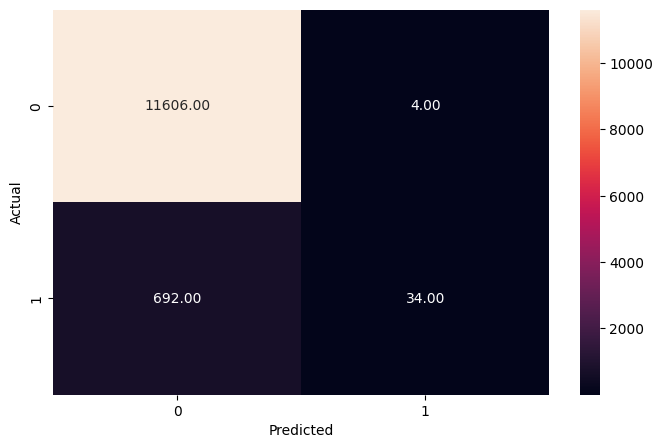

In [46]:
y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.85      0.06      0.10       197

    accuracy                           0.94      3084
   macro avg       0.89      0.53      0.54      3084
weighted avg       0.93      0.94      0.91      3084



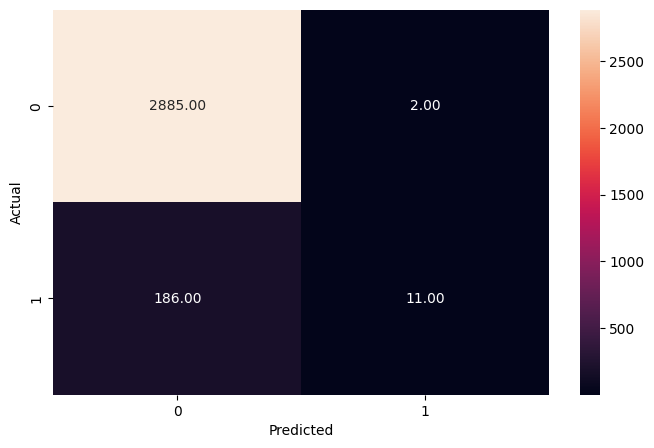

In [47]:
y_test_pred_dt=dt.predict(X_test)
metrics_score(y_test,y_test_pred_dt)

<Axes: xlabel='Importance', ylabel='None'>

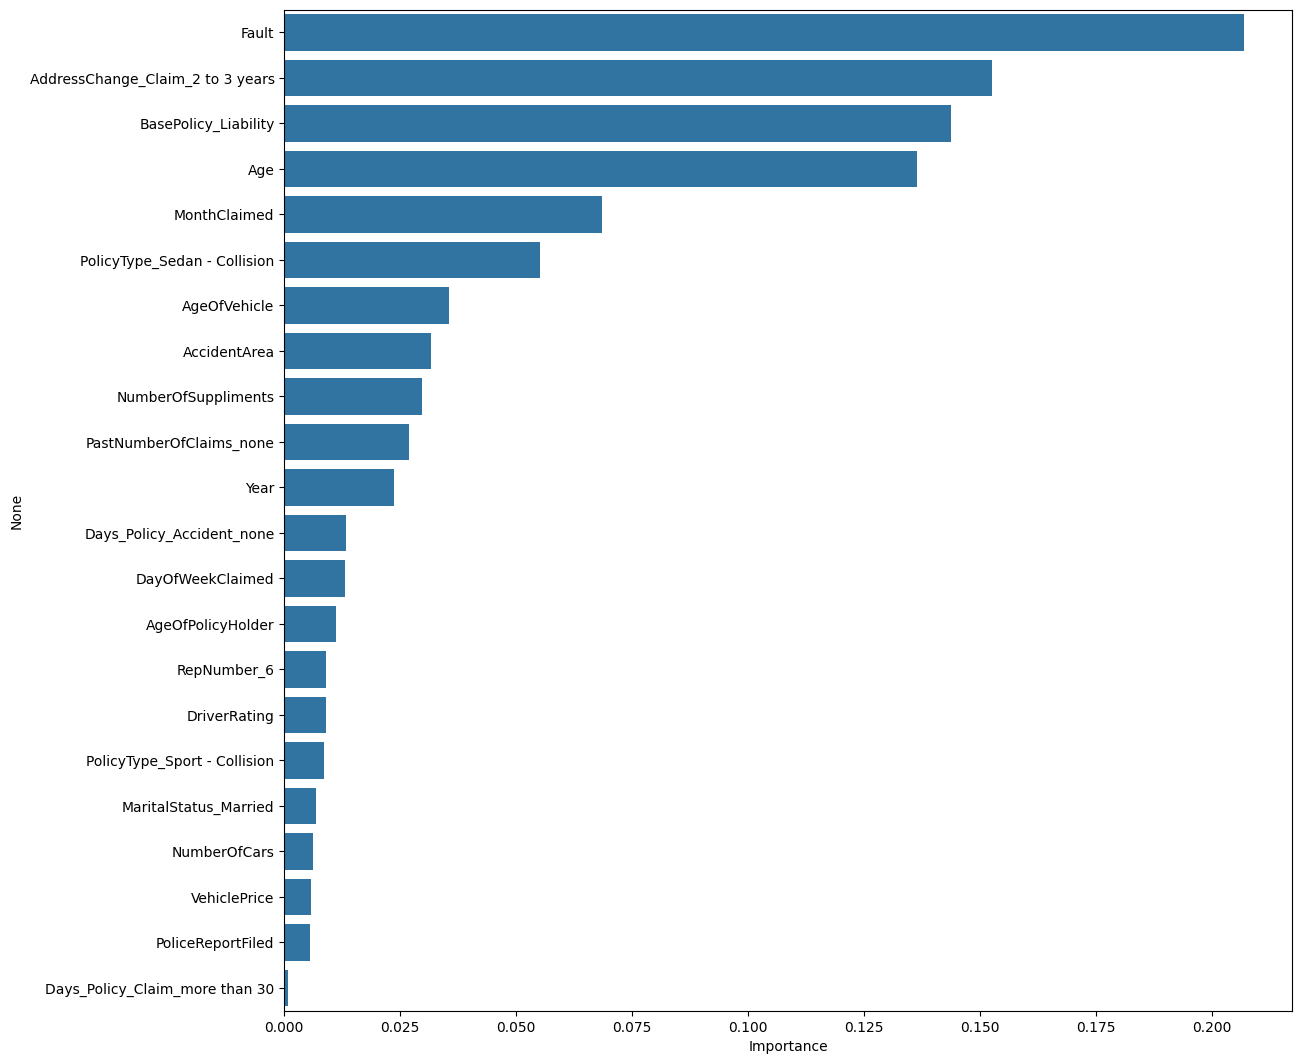

In [48]:
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

In [49]:
importance_df

Importance
Fault                               0.206897
AddressChange_Claim_2 to 3 years    0.152656
BasePolicy_Liability                0.143698
Age                                 0.136450
MonthClaimed                        0.068495
PolicyType_Sedan - Collision        0.055178
AgeOfVehicle                        0.035435
AccidentArea                        0.031654
NumberOfSuppliments                 0.029789
PastNumberOfClaims_none             0.026881
Year                                0.023572
Days_Policy_Accident_none           0.013383
DayOfWeekClaimed                    0.013021
AgeOfPolicyHolder                   0.011248
RepNumber_6                         0.008972
DriverRating                        0.008972
PolicyType_Sport - Collision        0.008612
MaritalStatus_Married               0.006903
NumberOfCars                        0.006188
VehiclePrice                        0.005772
PoliceReportFiled                   0.005523
Days_Policy_Claim_more than 30      0.000702

In [50]:
Unsignificant_Columns = importance_df[importance_df['Importance'] <= 0.005].index

In [51]:
Unsignificant_Columns

Index(['Days_Policy_Claim_more than 30'], dtype='object')

# KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11610
           1       1.00      0.08      0.15       726

    accuracy                           0.95     12336
   macro avg       0.97      0.54      0.56     12336
weighted avg       0.95      0.95      0.92     12336



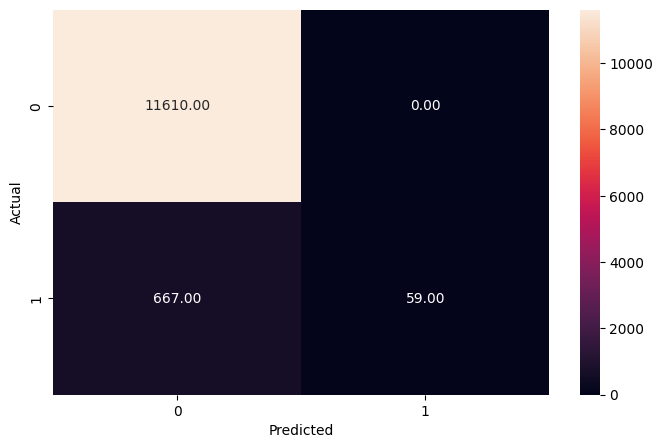

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.18      0.01      0.02       197

    accuracy                           0.93      3084
   macro avg       0.56      0.50      0.49      3084
weighted avg       0.89      0.93      0.91      3084



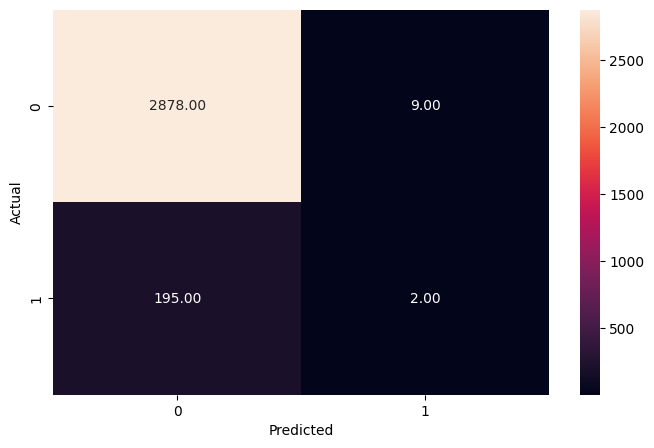

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train, y_train)
y_train_pred_kn=kn.predict(X_train)
metrics_score(y_train,y_train_pred_kn)
y_test_pred_kn=kn.predict(X_test)
metrics_score(y_test,y_test_pred_kn)

In [53]:
#SMOTE
import pandas as pd
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print("Class distribution after SMOTE:")
print(df_resampled["FraudFound_P"].value_counts())


Class distribution after SMOTE:
FraudFound_P
0    14497
1    14497
Name: count, dtype: int64


In [55]:
X = df_resampled.drop(columns=['FraudFound_P'])
y = df_resampled['FraudFound_P']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


print("Training data shape (X, y):", X_train.shape, y_train.shape)
print("Testing data shape (X, y):", X_test.shape, y_test.shape)

Training data shape (X, y): (23195, 22) (23195,)
Testing data shape (X, y): (5799, 22) (5799,)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
results = []
for n in range(1,16):
  kn = KNeighborsClassifier(n_neighbors=n)
  kn.fit(X_train, y_train)
  y_pred = kn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  results.append({'n_neighbors': n, 'accuracy': accuracy, 'f1_score': f1})
  #y_train_pred_kn=kn.predict(X_train)
  #metrics_score(y_train,y_train_pred_kn)
  #y_test_pred_kn=kn.predict(X_test)
  #metrics_score(y_test,y_test_pred_kn)
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

    n_neighbors  accuracy  f1_score
0             1  0.892395  0.902378
1             2  0.918089  0.923473
2             3  0.861528  0.878204
3             4  0.880669  0.892680
4             5  0.839283  0.861392
5             6  0.857389  0.874754
6             7  0.827901  0.852933
7             8  0.846353  0.866437
8             9  0.819107  0.846660
9            10  0.834799  0.857906
10           11  0.807208  0.838205
11           12  0.824797  0.850544
12           13  0.803069  0.835209
13           14  0.819107  0.846210
14           15  0.799448  0.832493


#**Using a MinMax Scaler for the Logistic Regression Model**

In [57]:
model = LogisticRegression(max_iter=1000,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82     11597
           1       0.80      0.90      0.84     11598

    accuracy                           0.83     23195
   macro avg       0.84      0.83      0.83     23195
weighted avg       0.84      0.83      0.83     23195



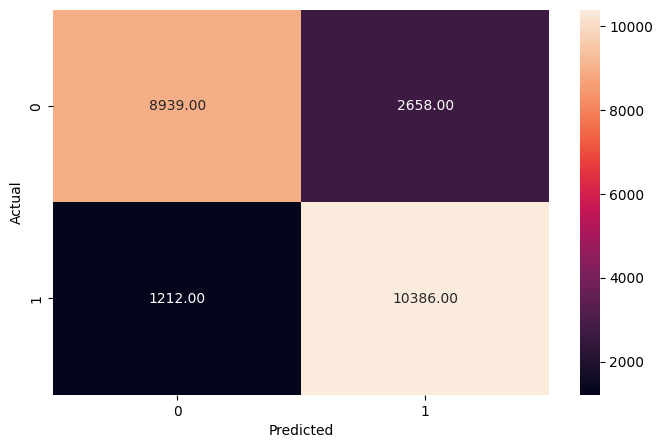

              precision    recall  f1-score   support

           0       0.88      0.77      0.83      2900
           1       0.80      0.90      0.85      2899

    accuracy                           0.84      5799
   macro avg       0.84      0.84      0.84      5799
weighted avg       0.84      0.84      0.84      5799



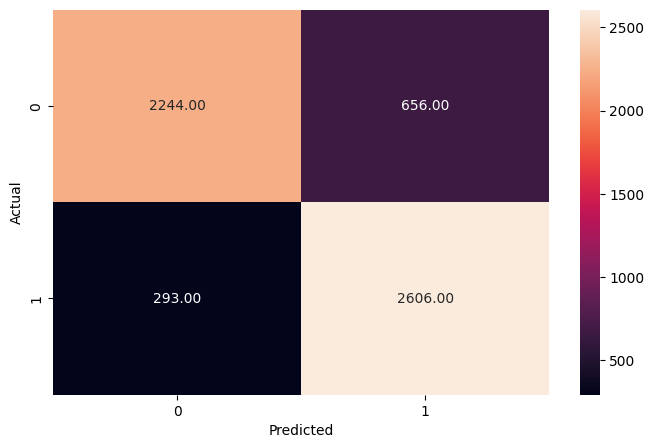

In [58]:


model.fit(X_train_scaled, y_train)
y_train_pred_model=model.predict(X_train_scaled)
metrics_score(y_train,y_train_pred_model)
y_test_pred_model=model.predict(X_test_scaled)
metrics_score(y_test,y_test_pred_model)

# **Final Model** : KNN with 2 Neighbors and after handling unbalanced data using SMOTE

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11597
           1       1.00      0.99      1.00     11598

    accuracy                           1.00     23195
   macro avg       1.00      1.00      1.00     23195
weighted avg       1.00      1.00      1.00     23195



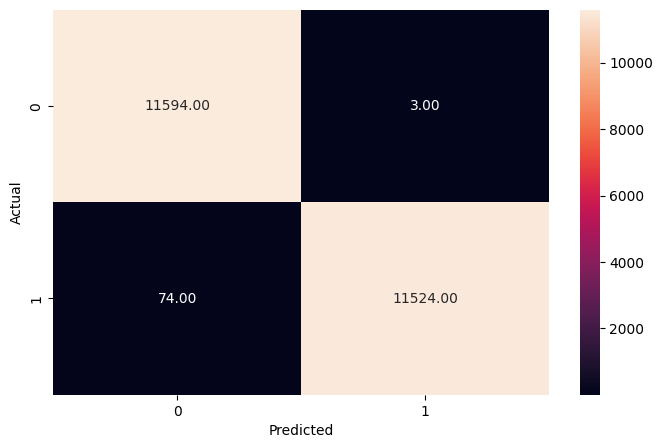

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2900
           1       0.87      0.99      0.92      2899

    accuracy                           0.92      5799
   macro avg       0.93      0.92      0.92      5799
weighted avg       0.93      0.92      0.92      5799



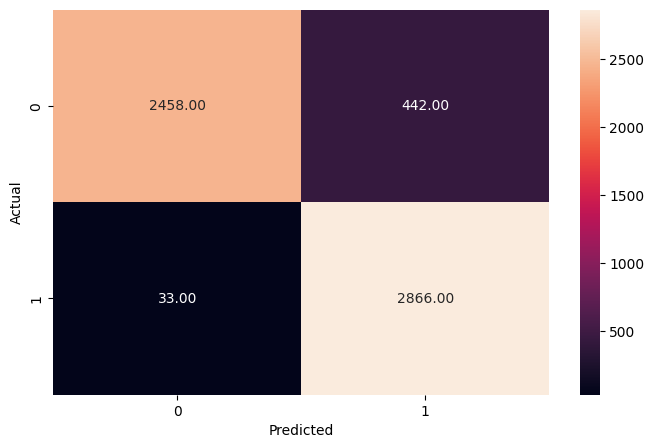

In [59]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
y_train_pred_kn=kn.predict(X_train)
metrics_score(y_train,y_train_pred_kn)
y_test_pred_kn=kn.predict(X_test)
metrics_score(y_test,y_test_pred_kn)